In [1220]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

In [1221]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [1222]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [1223]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [1224]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [1225]:
#load the dataset
data=pd.read_csv(r"C:\Users\90544\Desktop\healthcare-dataset-stroke-data.csv")
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [1226]:
data.shape
#This dataset has 5110 rows and 12 columns.

(5110, 12)

In [1227]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [1228]:
#Find the distribution of lost data
columns = list(data.columns) #Save the variables to a list to have easy access to the different columns of the dataset
print("Missing values distribution: ")
print(data.isnull().mean()) # show that BMI column has the highest percentage of missing data   BMI =vücut kitle endeksi


print("\nColumn datatypes: ")
print(data.dtypes)   # object means either string or mixed type (numerical and non-numerical type mixed)

    
print("\n")
print(data.head())

Missing values distribution: 
id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

Column datatypes: 
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  3111

In [1229]:
data.duplicated().sum()

0

In [1230]:
data.describe(include="object").T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [1231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:>

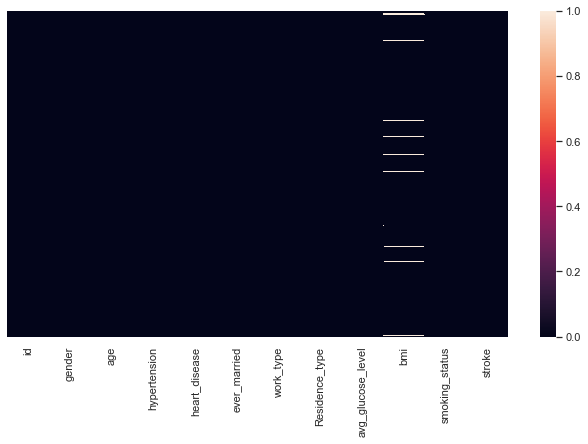

In [1232]:
sns.heatmap(data.isnull(),yticklabels =False)

In [1233]:
data.skew()

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

<AxesSubplot:xlabel='stroke', ylabel='Density'>

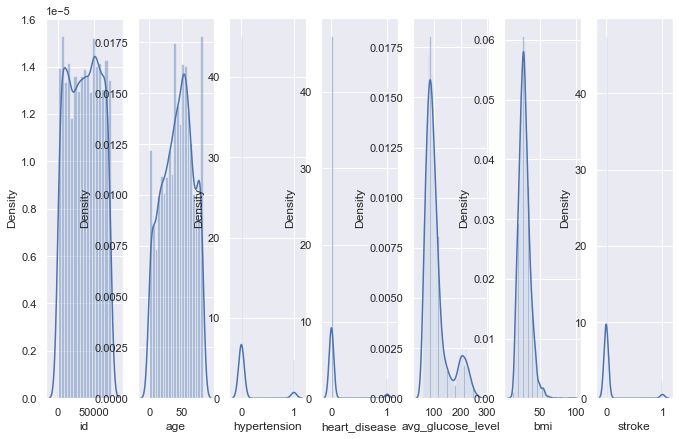

In [1234]:
from scipy.stats import skewnorm
import seaborn as sbs
fig, ax = plt.subplots(1, 7, figsize=(10, 7))

sbs.distplot(data['id'], ax=ax[0])
sbs.distplot(data['age'], ax=ax[1])
sbs.distplot(data['hypertension'], ax=ax[2])
sbs.distplot(data['heart_disease'], ax=ax[3])
sbs.distplot(data['avg_glucose_level'], ax=ax[4])
sbs.distplot(data['bmi'], ax=ax[5])
sbs.distplot(data['stroke'], ax=ax[6])

In [1235]:
# Drop the unnecessary column
data.dropna(inplace=True)
data.drop(columns=["id"],axis=1, inplace=True)

Unique values
 ['Male' 'Female' 'Other']

Value Counts
 Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
Men are more likely to have a stroke: 4.43%
Women are more likely to have a stroke: 4.14%


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


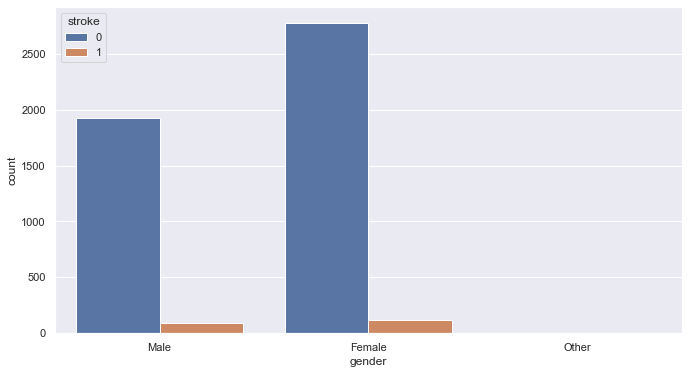

In [1236]:
#Data Visualization and Analysis
#Comparison of how the stroke rate is affected for 'gender' feature

print('Unique values\n',data['gender'].unique())
print('\nValue Counts\n',data['gender'].value_counts())
#Help to give us information about it's unique values and count of each value.

sns.countplot(data=data,x='gender',hue='stroke')
#Analyze how gender will affect chances of stroke.

print(f'Men are more likely to have a stroke: {round(data[data["gender"]=="Male"]["stroke"].mean()*100,2)}%')
print(f'Women are more likely to have a stroke: {round(data[data["gender"]=="Female"]["stroke"].mean()*100,2)}%')

data.loc[data["gender"]=="Other"]

In [1237]:
data.drop([3116], inplace=True)

Unique values
 ['Yes' 'No']

Value Counts
 Yes    3204
No     1704
Name: ever_married, dtype: int64
Married are more likely to have a stroke: 5.81%
Not married are more likely to have a stroke: 1.35%


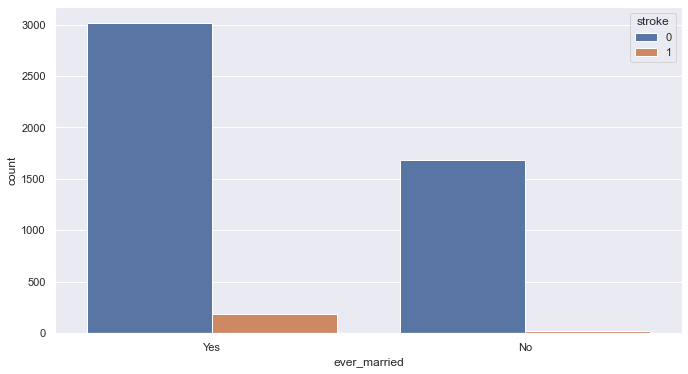

In [1238]:
#Comparison of how the stroke rate is affected for 'ever_married' feature

print('Unique values\n',data['ever_married'].unique())
print('\nValue Counts\n',data['ever_married'].value_counts())
#Help to give us information about it's unique values and count of each value.

sns.countplot(data=data,x='ever_married',hue='stroke')
#Analyze how ever_married will affect chances of stroke.

print(f'Married are more likely to have a stroke: {round(data[data["ever_married"]=="Yes"]["stroke"].mean()*100,2)}%')
print(f'Not married are more likely to have a stroke: {round(data[data["ever_married"]=="No"]["stroke"].mean()*100,2)}%')

Unique values
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Value Counts
 Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Private are more likely to have a stroke: 4.52%
Self-employed are more likely to have a stroke: 6.84%
Govt_job are more likely to have a stroke: 4.44%
children are more likely to have a stroke: 0.15%
Never_worked are more likely to have a stroke: 0.0%


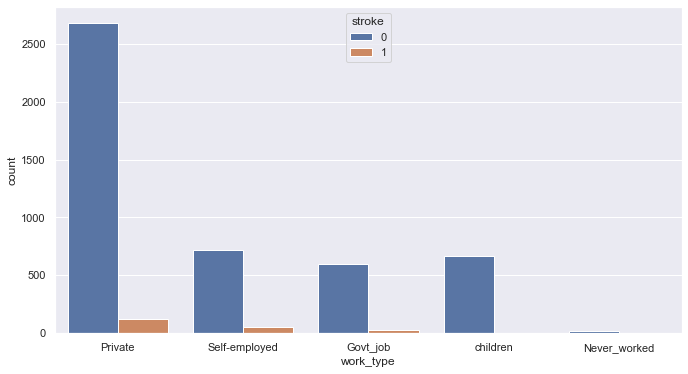

In [1239]:
#Comparison of how the stroke rate is affected for 'work_type' feature

print('Unique values\n',data['work_type'].unique())
print('\nValue Counts\n',data['work_type'].value_counts())
#Help to give us information about it's unique values and count of each value.

sns.countplot(data=data,x='work_type',hue='stroke')
#Analyze how work_type will affect chances of stroke.

print(f'Private are more likely to have a stroke: {round(data[data["work_type"]=="Private"]["stroke"].mean()*100,2)}%')
print(f'Self-employed are more likely to have a stroke: {round(data[data["work_type"]=="Self-employed"]["stroke"].mean()*100,2)}%')
print(f'Govt_job are more likely to have a stroke: {round(data[data["work_type"]=="Govt_job"]["stroke"].mean()*100,2)}%')
print(f'children are more likely to have a stroke: {round(data[data["work_type"]=="children"]["stroke"].mean()*100,2)}%')
print(f'Never_worked are more likely to have a stroke: {round(data[data["work_type"]=="Never_worked"]["stroke"].mean()*100,2)}%')

In [1240]:
# Never worked data consist of children. That's why there are no stroke.
data.loc[data["work_type"]=="Never_worked"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
603,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
886,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
939,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
959,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0
1462,Male,17.0,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
1789,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
1922,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
2346,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
2721,Female,17.0,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0


Unique values
 ['Urban' 'Rural']

Value Counts
 Urban    2490
Rural    2418
Name: Residence_type, dtype: int64
Urban are more likely to have a stroke: 4.38%
Rural are more likely to have a stroke: 4.14%


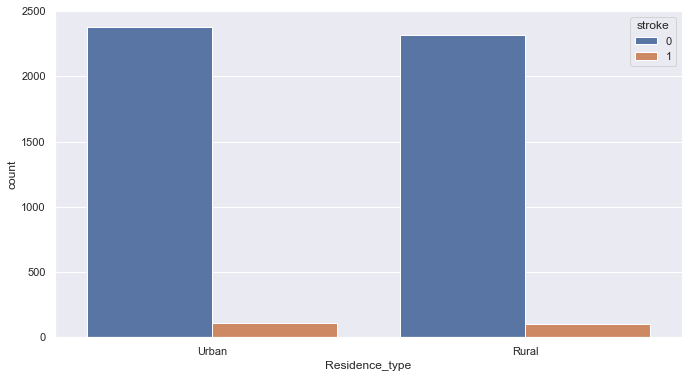

In [1241]:
#Comparison of how the stroke rate is affected for 'Residence_type' feature

print('Unique values\n',data['Residence_type'].unique())
print('\nValue Counts\n',data['Residence_type'].value_counts())
#Help to give us information about it's unique values and count of each value.

sns.countplot(data=data,x='Residence_type',hue='stroke')
#Analyze how Residence_type will affect chances of stroke.


print(f'Urban are more likely to have a stroke: {round(data[data["Residence_type"]=="Urban"]["stroke"].mean()*100,2)}%')
print(f'Rural are more likely to have a stroke: {round(data[data["Residence_type"]=="Rural"]["stroke"].mean()*100,2)}%')


Unique values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

Value Counts
 never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64
The probability of having a stroke in someone with formerly smoked: 6.82%
The probability of having a stroke in someone with never smoked:4.54%
The probability of having a stroke in someone with smokes: 5.29%
The probability of having a stroke in someone that Unknown:1.96%


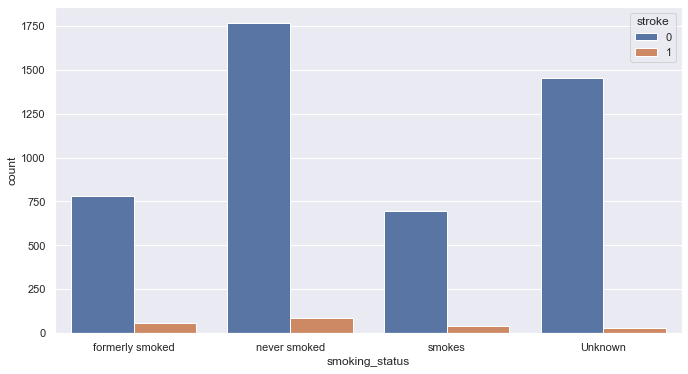

In [1242]:
#Comparison of how the stroke rate is affected for 'smoking_status' feature

print('Unique values\n',data['smoking_status'].unique())
print('\nValue Counts\n',data['smoking_status'].value_counts())
#Help to give us information about it's unique values and count of each value.

sns.countplot(data=data,x='smoking_status',hue='stroke')
#Analyze how smoking_status will affect chances of stroke.
print(f'The probability of having a stroke in someone with formerly smoked: {round(data[data["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)}%')
print(f'The probability of having a stroke in someone with never smoked:{round(data[data["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)}%')

print(f'The probability of having a stroke in someone with smokes: {round(data[data["smoking_status"]=="smokes"]["stroke"].mean()*100,2)}%')
print(f'The probability of having a stroke in someone that Unknown:{round(data[data["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)}%')

<AxesSubplot:xlabel='stroke', ylabel='age'>

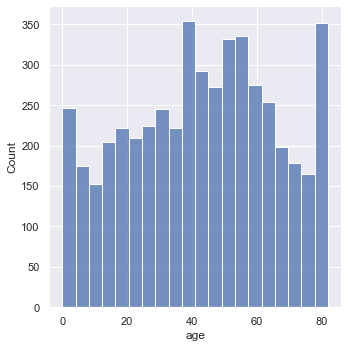

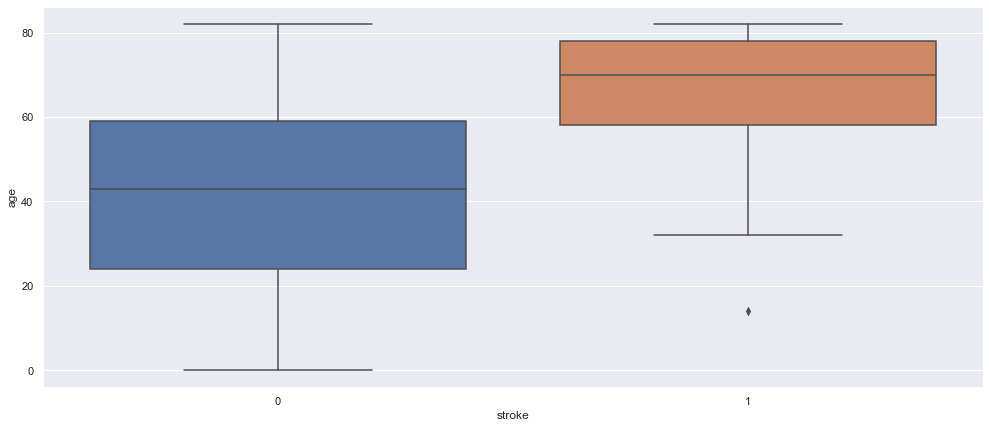

In [1243]:
#Comparison of how the stroke rate is affected for 'age' feature

data['age'].nunique()
# Returns number of unique values in this attribute

sns.displot(data['age'])
# This will plot a distribution plot of variable age

plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')
#Will plot a boxplot 

Unique values
 [0 1]

Value Counts
 0    4457
1     451
Name: hypertension, dtype: int64
The probability of having a stroke in someone with hypertension is:13.3%
The probability of having a stroke in someone without hypertension is: 3.34%


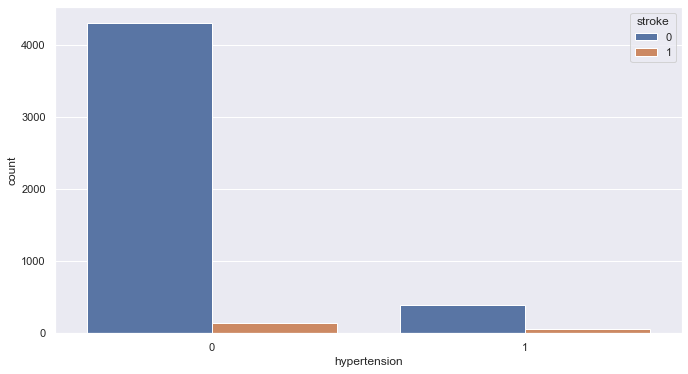

In [1244]:
#Comparison of how the stroke rate is affected for 'hypertension' feature

print('Unique values\n',data['hypertension'].unique())
print('\nValue Counts\n',data['hypertension'].value_counts())
#Help to give us information about it's unique values and count of each value.

sns.countplot(data=data,x='hypertension',hue='stroke')
#Analyze how hypertension will affect chances of stroke.

print(f'The probability of having a stroke in someone with hypertension is:{round(data[data["hypertension"]==1]["stroke"].mean()*100,2)}%')
print(f'The probability of having a stroke in someone without hypertension is: {round(data[data["hypertension"]==0]["stroke"].mean()*100,2)}%')

Unique values
 [1 0]

Value Counts
 0    4665
1     243
Name: heart_disease, dtype: int64
The odds of having a stroke in someone with a heart condition are: 16.46%
The probability of having a stroke in someone without heart disease is:3.62%


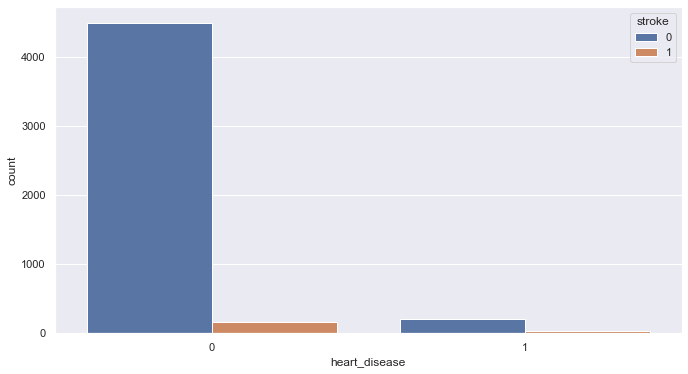

In [1245]:
#Comparison of how the stroke rate is affected for 'heart_disease' feature

print('Unique values\n',data['heart_disease'].unique())
print('\nValue Counts\n',data['heart_disease'].value_counts())
#Help to give us information about it's unique values and count of each value.

sns.countplot(data=data,x='heart_disease',hue='stroke')
#Analyze how heart_disease will affect chances of stroke.

print(f'The odds of having a stroke in someone with a heart condition are: {round(data[data["heart_disease"]==1]["stroke"].mean()*100,2)}%')
print(f'The probability of having a stroke in someone without heart disease is:{round(data[data["heart_disease"]==0]["stroke"].mean()*100,2)}%')

Unique values
 3851


<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

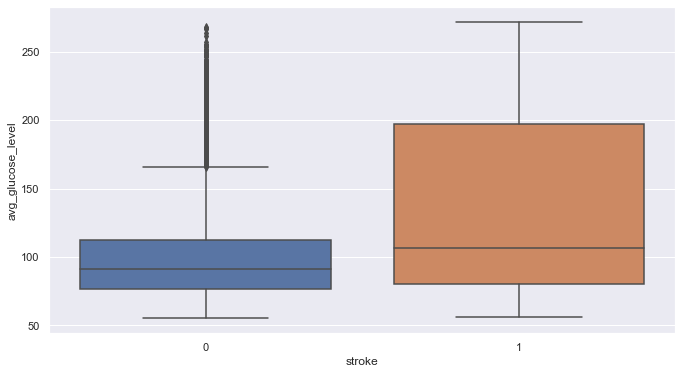

In [1246]:
#Comparison of how the stroke rate is affected for 'avg_glucose_level' feature

print('Unique values\n', data['avg_glucose_level'].nunique()) 
#Number of unique values

sns.boxplot(data=data,x='stroke',y='avg_glucose_level')
#Analyze how avg_glucose_level will affect chances of stroke.

Old Shape:  (4908, 11)


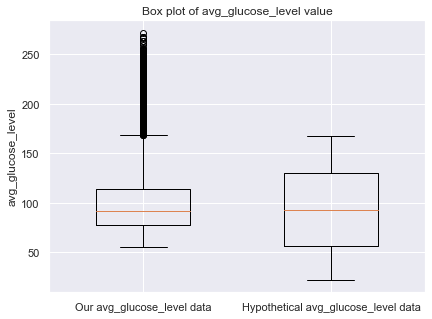

New Shape:  (4908, 11)


In [1247]:
#outlier removal for glucose level

print("Old Shape: ", data.shape)
 
Q1,Q3 = np.percentile(data['avg_glucose_level'] , [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR    #upper limit
ll = Q1-1.5*IQR    #lower limit
outliers = data[(data['avg_glucose_level'] > ul) | (data['avg_glucose_level'] < ll)].index

fig = plt.figure(figsize=(6,5))
hypo = np.random.randint(ll,ul, size=5110)
plt.boxplot([data['avg_glucose_level'], hypo], widths=0.5)
plt.xticks([1,2],['Our avg_glucose_level data', 'Hypothetical avg_glucose_level data'])
plt.ylabel('avg_glucose_level')
plt.title('Box plot of avg_glucose_level value')
plt.show()
#Find IQR for use to boxplot

data_new = data['avg_glucose_level'].drop(outliers)
data['avg_glucose_level'] = data_new

print("New Shape: ", data.shape)


<AxesSubplot:>

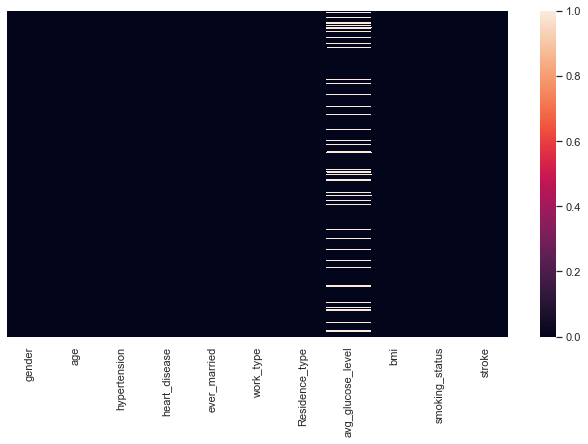

In [1248]:
sns.heatmap(data.isnull(),yticklabels =False)

In [1249]:
data['avg_glucose_level'].fillna(data['avg_glucose_level'].mean(),inplace=True)
#Filling null values with average value


<AxesSubplot:>

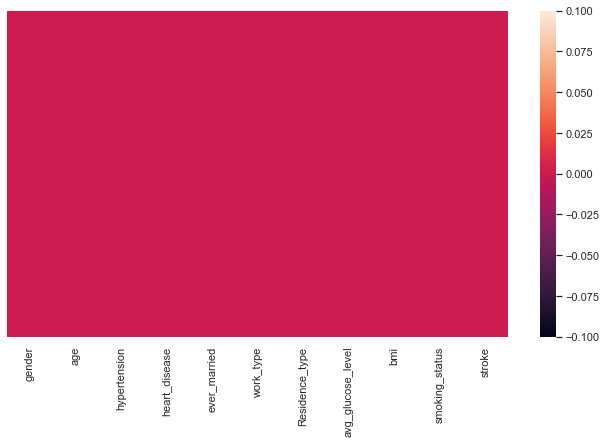

In [1250]:
sns.heatmap(data.isnull(),yticklabels =False)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

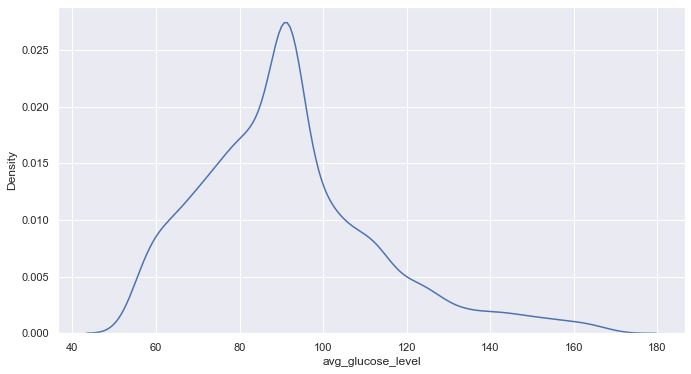

In [1251]:
sns.kdeplot(data['avg_glucose_level'])

Null values
 0

Unique Values
 418


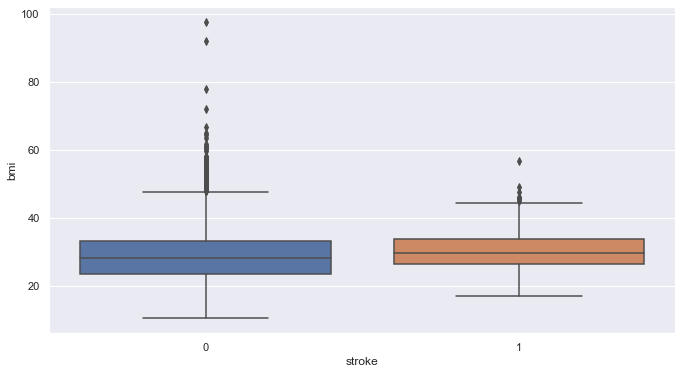

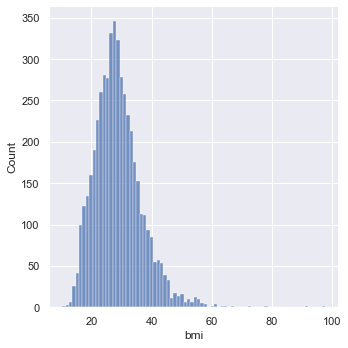

In [1252]:
#Comparison of how the stroke rate is affected for 'bmi' feature

print('Null values\n',data['bmi'].isna().sum())
#Number of null values

print('\nUnique Values\n', data['bmi'].nunique())
#Number of unique values

sns.boxplot(data=data,x='stroke',y='bmi')

sns.displot(data['bmi']) 
#distribution of bmi

Old Shape:  (4908, 11)


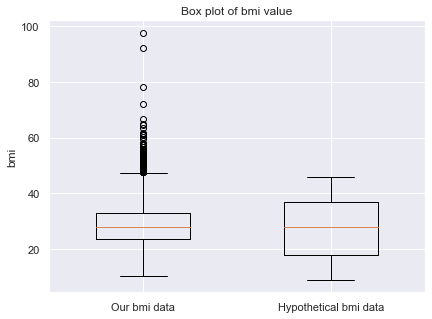

New Shape:  (4908, 11)


In [1253]:
#outlier removal for bmi

print("Old Shape: ", data.shape)
 
Q1,Q3 = np.percentile(data['bmi'] , [25,75])

IQR = Q3 - Q1

ul = Q3+1.5*IQR    #upper limit
ll = Q1-1.5*IQR    #lower limit

outliers = data[(data['bmi'] > ul) | (data['bmi'] < ll)].index

fig = plt.figure(figsize=(6,5))
hypo = np.random.randint(ll,ul, size=5110)
plt.boxplot([data['bmi'], hypo], widths=0.5)
plt.xticks([1,2],['Our bmi data', 'Hypothetical bmi data'])
plt.ylabel('bmi')
plt.title('Box plot of bmi value')
plt.show()
#Find IQR for use to boxplot

data['bmi'] = data['bmi'].drop(outliers)

print("New Shape: ", data.shape)

In [1254]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  110
smoking_status         0
stroke                 0
dtype: int64

In [1255]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
#Filling null values with average value


<AxesSubplot:>

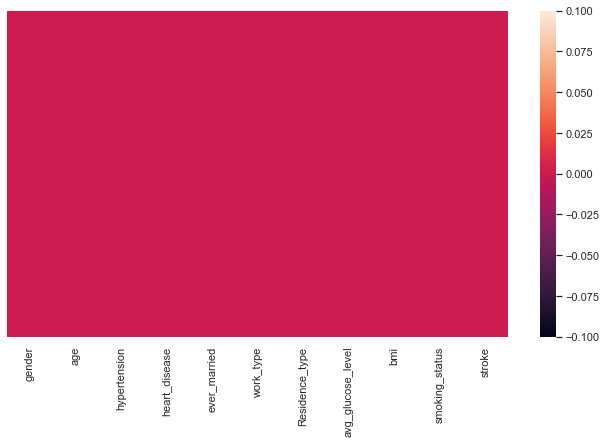

In [1256]:
sns.heatmap(data.isnull(),yticklabels =False)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

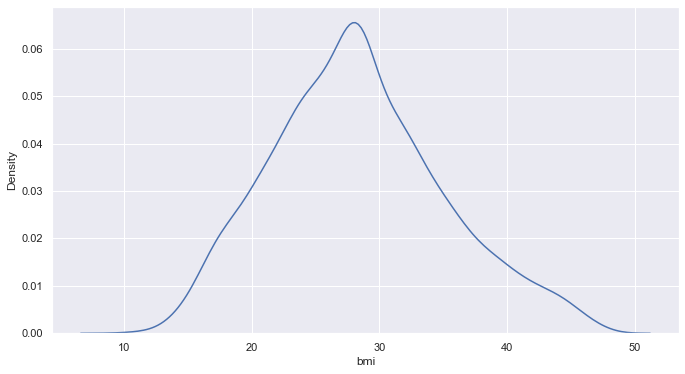

In [1257]:
sns.kdeplot(data['bmi'])

In [1258]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Unique Value
 [1 0]
Value Counts
 0    4699
1     209
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

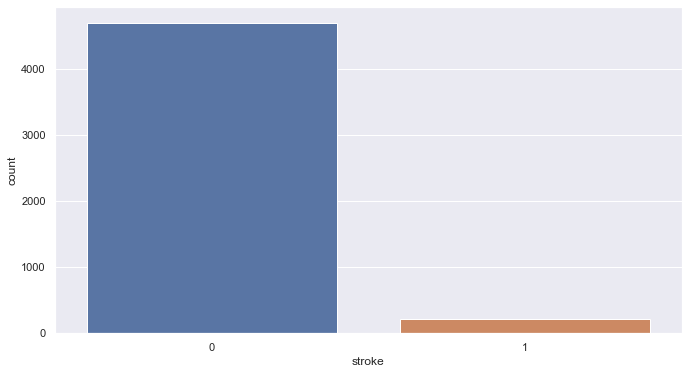

In [1259]:
#Have chances of stroke
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())

sns.countplot(data=data,x='stroke')
# Count Plot of Stroke


In [1260]:
#Label encoding to convert data

cols=data.select_dtypes(include=['object']).columns
print(cols)
# This code will fetch columns whose data type is object.

le=LabelEncoder()
# Initializing our Label Encoder object

data[cols]=data[cols].apply(le.fit_transform)
# Transfering categorical data into numeric

print(data.head(10))

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
    gender   age  hypertension  heart_disease  ever_married  work_type  \
0        1  67.0             0              1             1          2   
2        1  80.0             0              1             1          2   
3        0  49.0             0              0             1          2   
4        0  79.0             1              0             1          3   
5        1  81.0             0              0             1          2   
6        1  74.0             1              1             1          2   
7        0  69.0             0              0             0          2   
9        0  78.0             0              0             1          2   
10       0  81.0             1              0             1          2   
11       0  61.0             0              1             1          0   

    Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0  

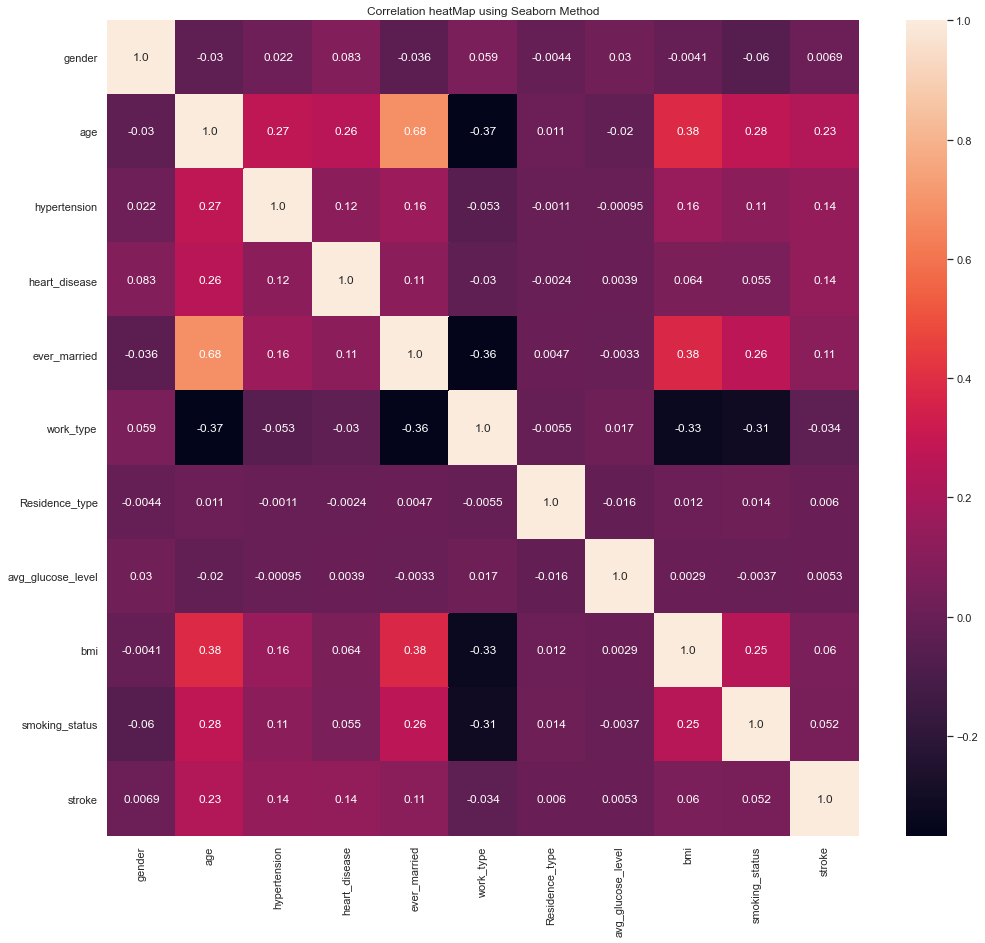

In [1261]:
#Create Correlation heatMap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt='.2')
plt.title( "Correlation heatMap using Seaborn Method" )
plt.show()

In [1262]:
#CLASSIFICATION

from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

In [1263]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

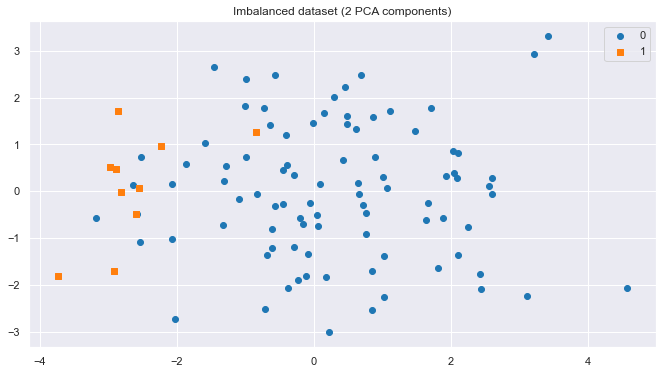

In [1264]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [1265]:
# Normalization
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

normalized_data = preprocessing.normalize(data, axis=0)
names = data.columns
scaled_nd = pd.DataFrame(normalized_data, columns=names)
print(scaled_nd.head())

     gender       age  hypertension  heart_disease  ever_married  work_type  \
0  0.022299  0.019743      0.000000        0.06415      0.017667   0.011750   
1  0.022299  0.023574      0.000000        0.06415      0.017667   0.011750   
2  0.000000  0.014439      0.000000        0.00000      0.017667   0.011750   
3  0.000000  0.023279      0.047088        0.00000      0.017667   0.017625   
4  0.022299  0.023869      0.000000        0.00000      0.017667   0.011750   

   Residence_type  avg_glucose_level       bmi  smoking_status    stroke  
0         0.02004           0.013903  0.017946        0.008199  0.069171  
1         0.00000           0.016108  0.015936        0.016397  0.069171  
2         0.02004           0.013903  0.016867        0.024596  0.069171  
3         0.00000           0.013903  0.011768        0.016397  0.069171  
4         0.02004           0.013903  0.014219        0.008199  0.069171  


Text(0.5, 0.98, 'Original distribution')

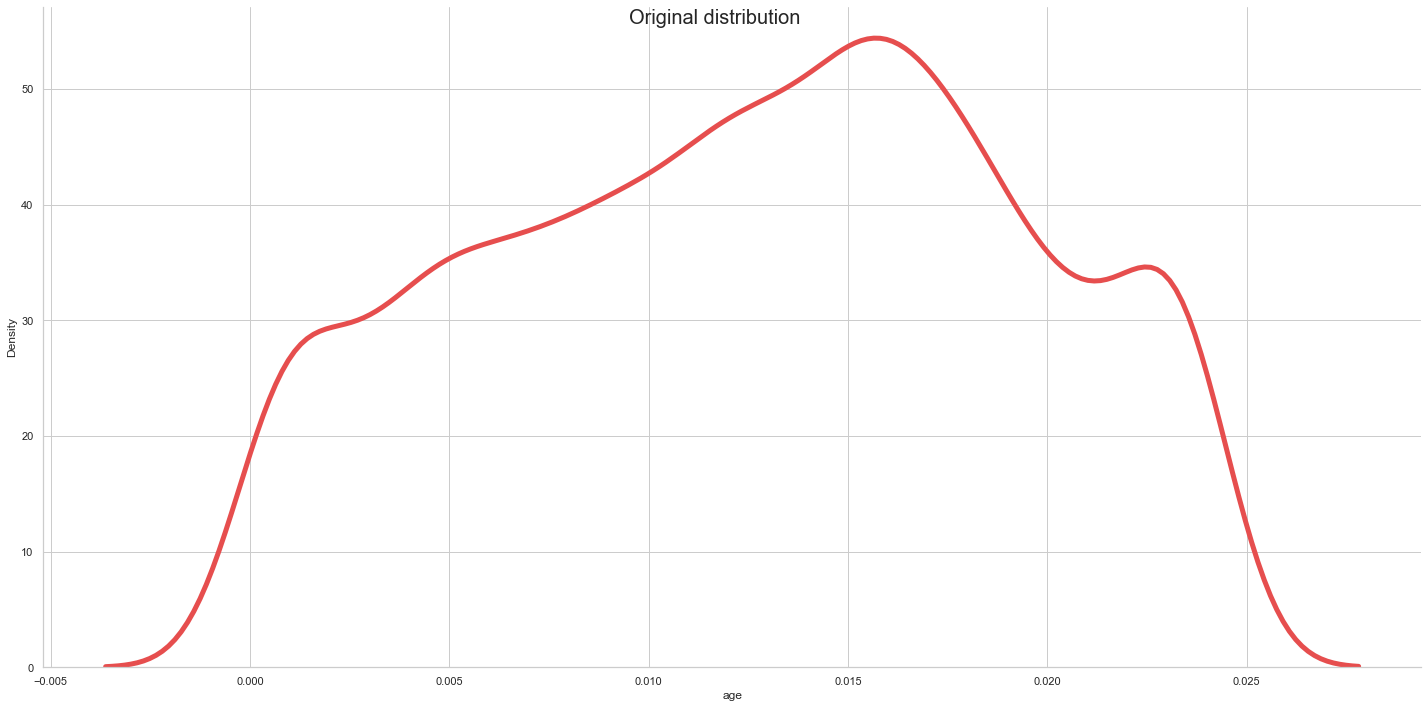

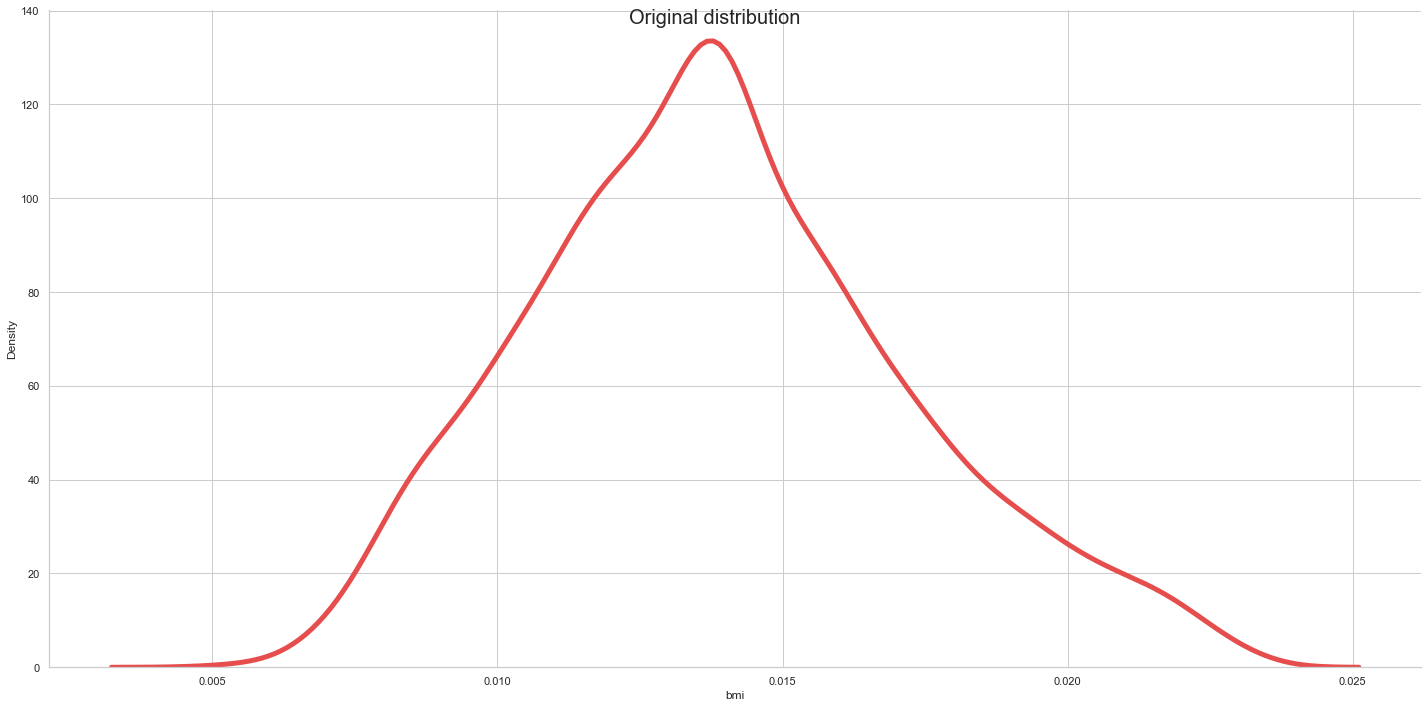

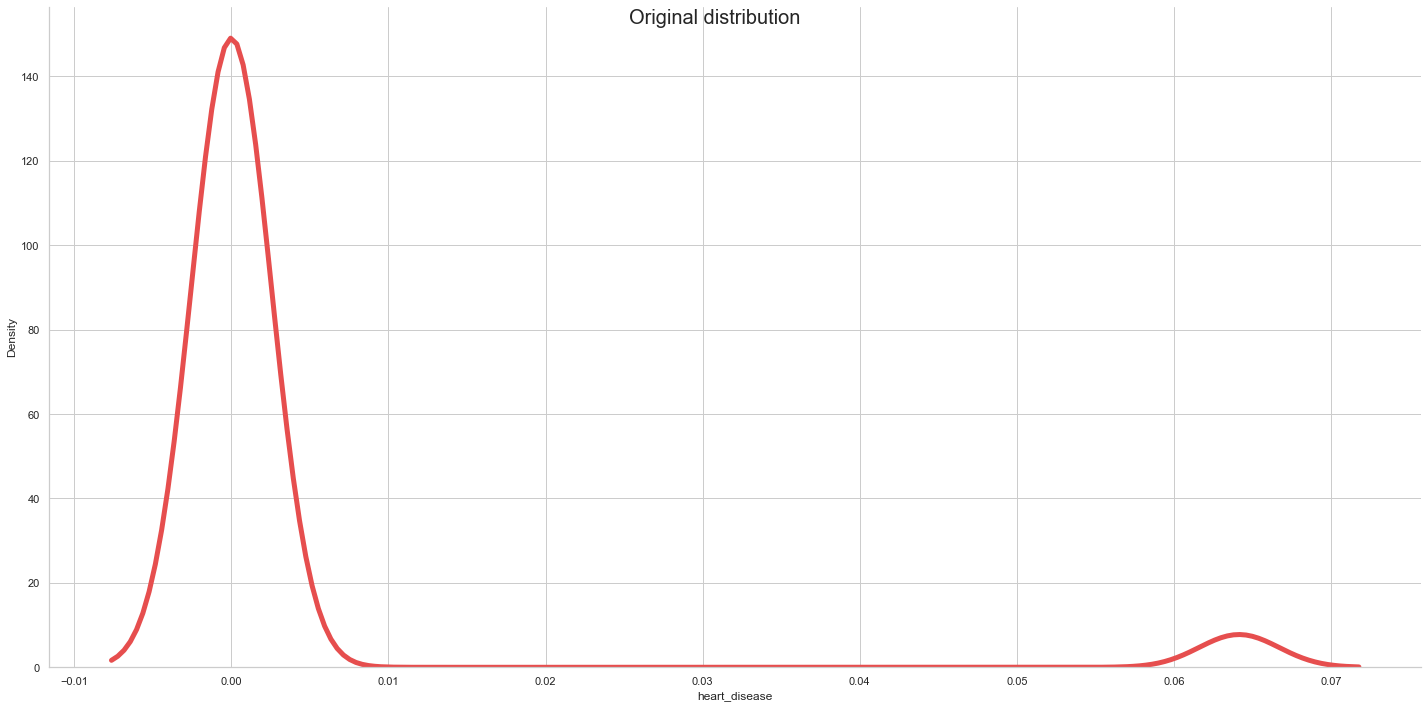

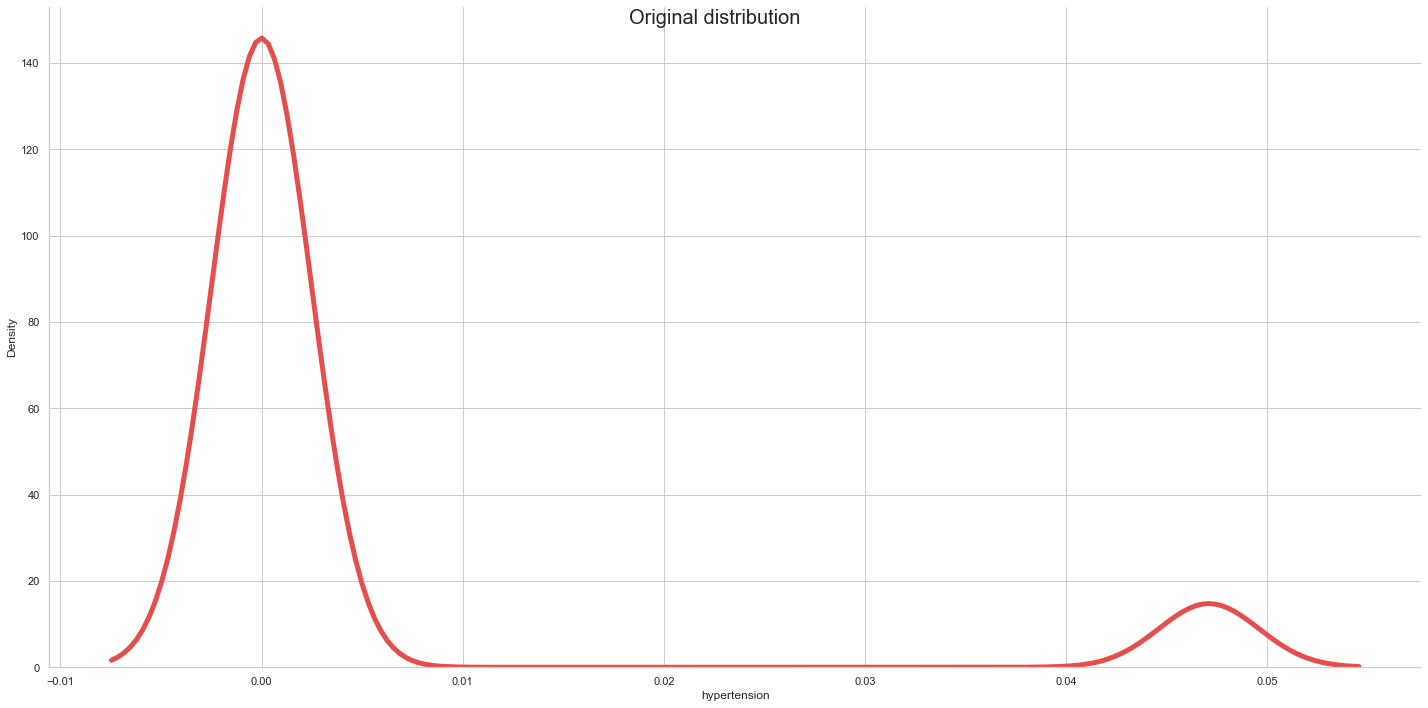

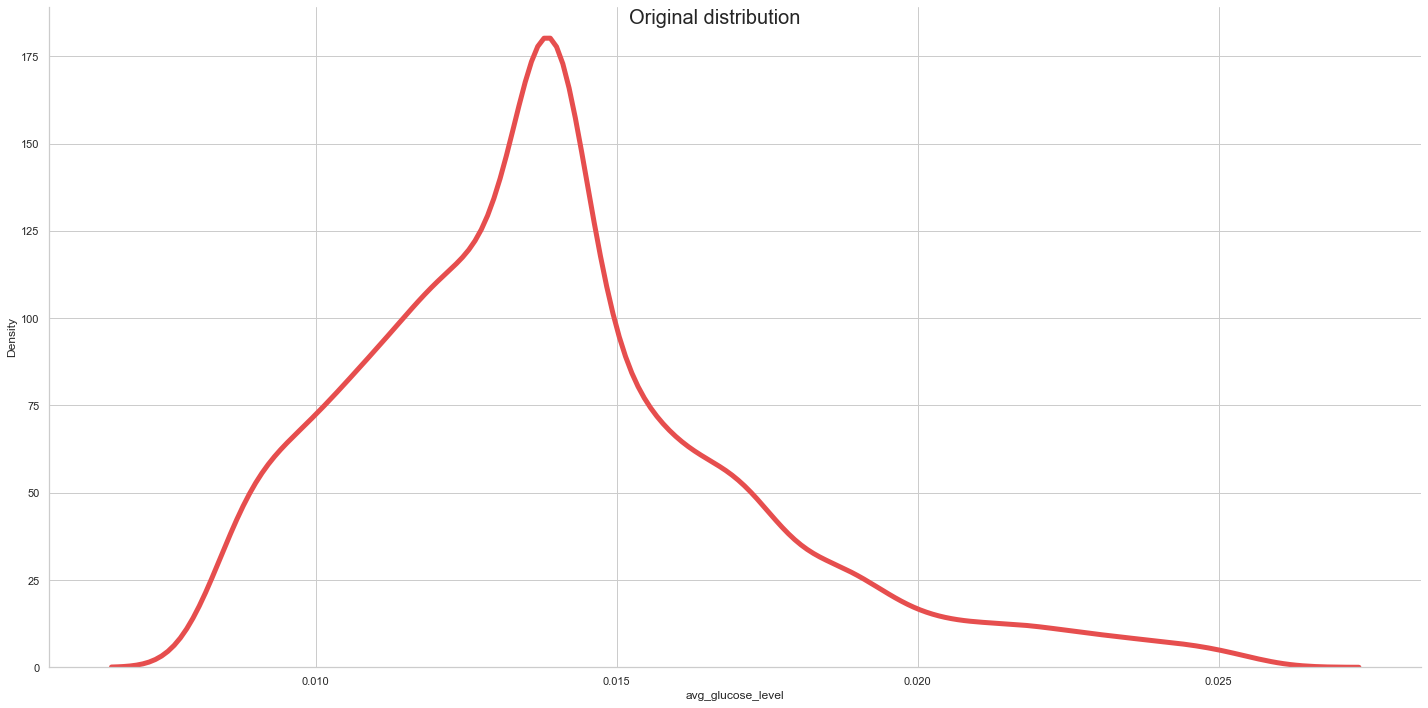

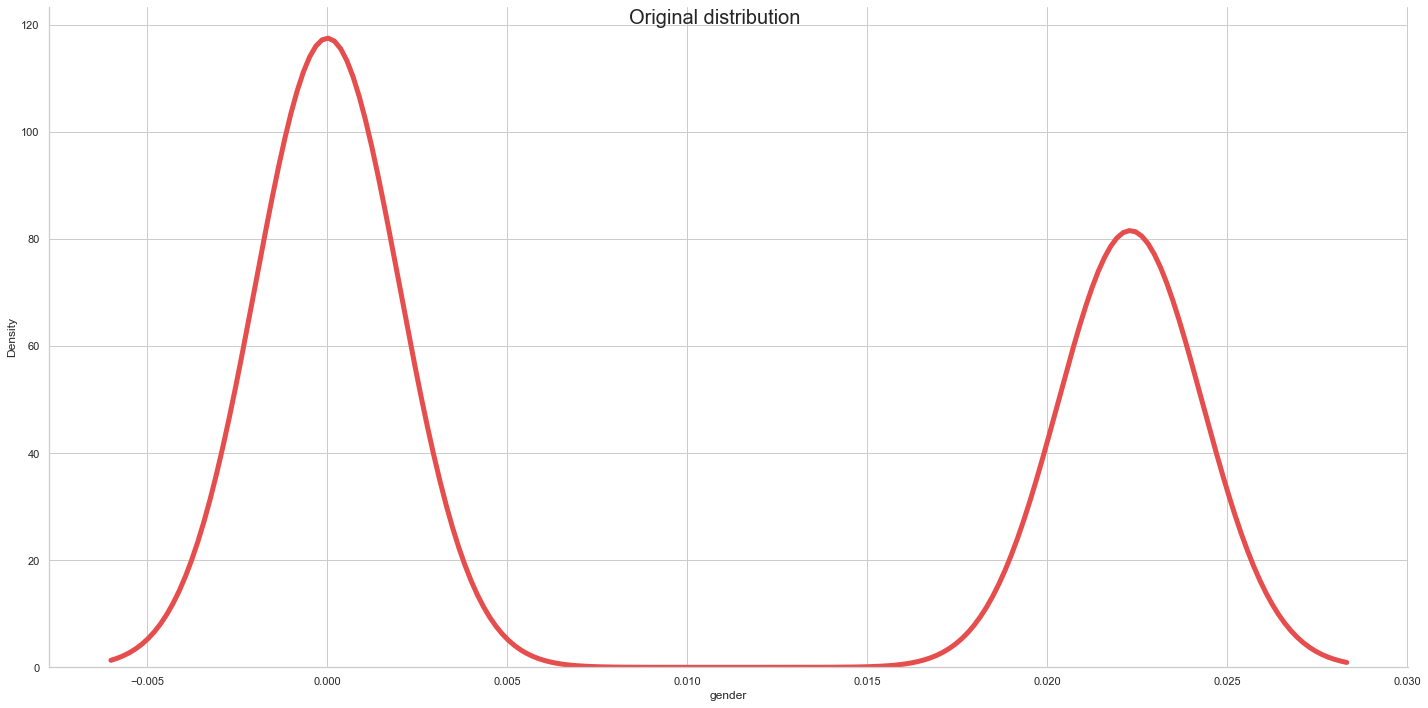

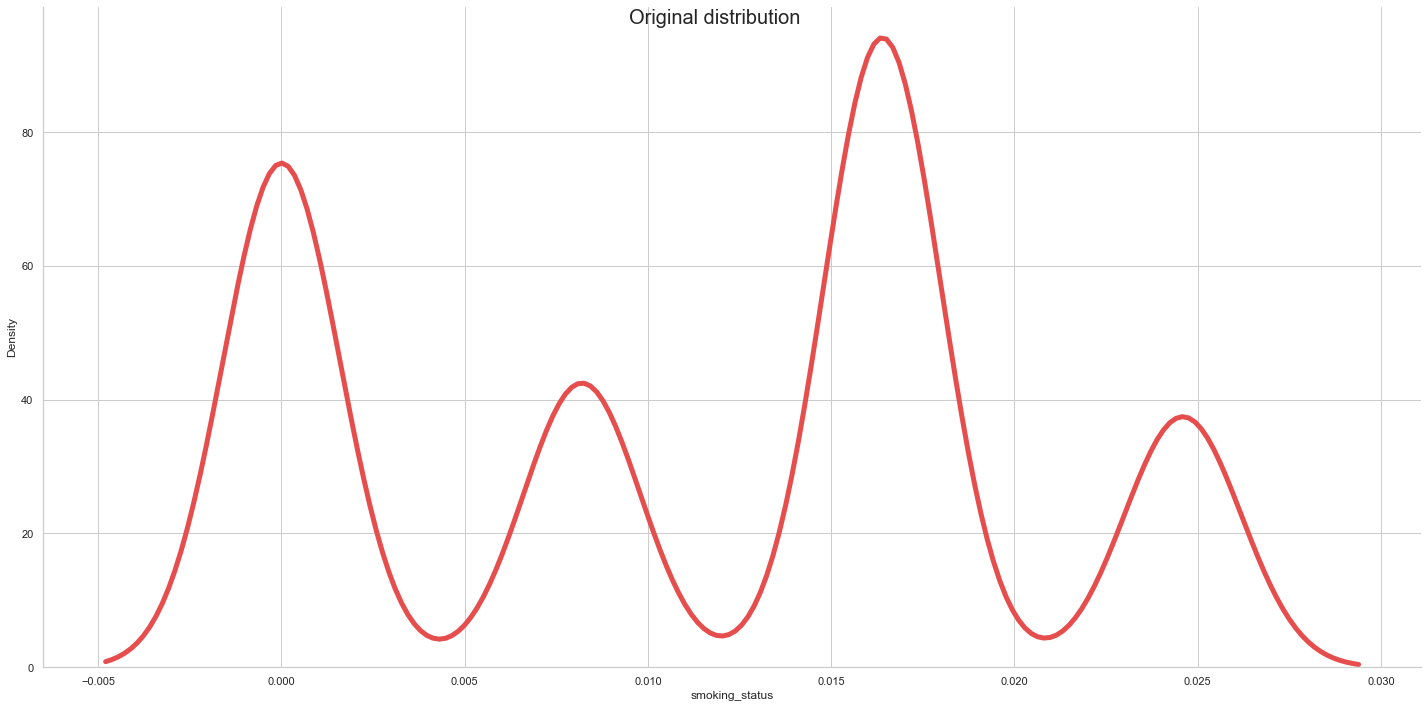

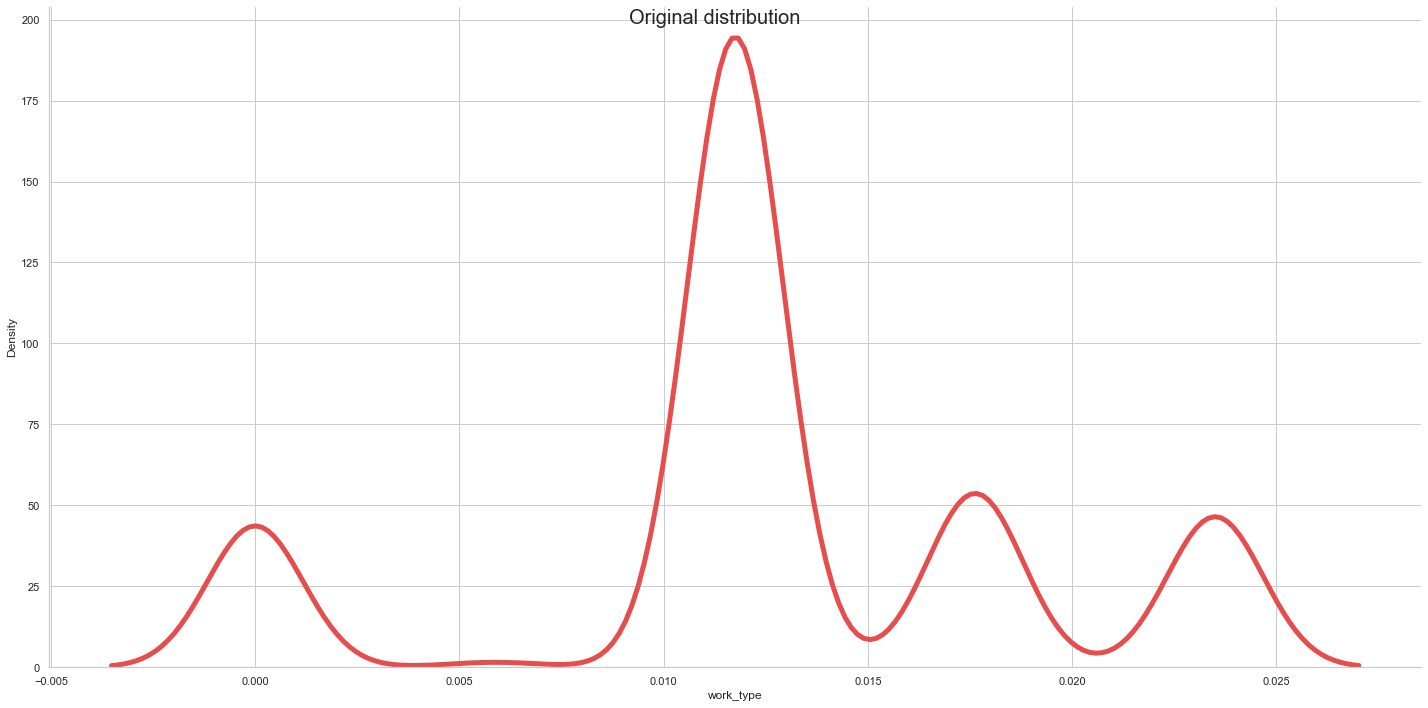

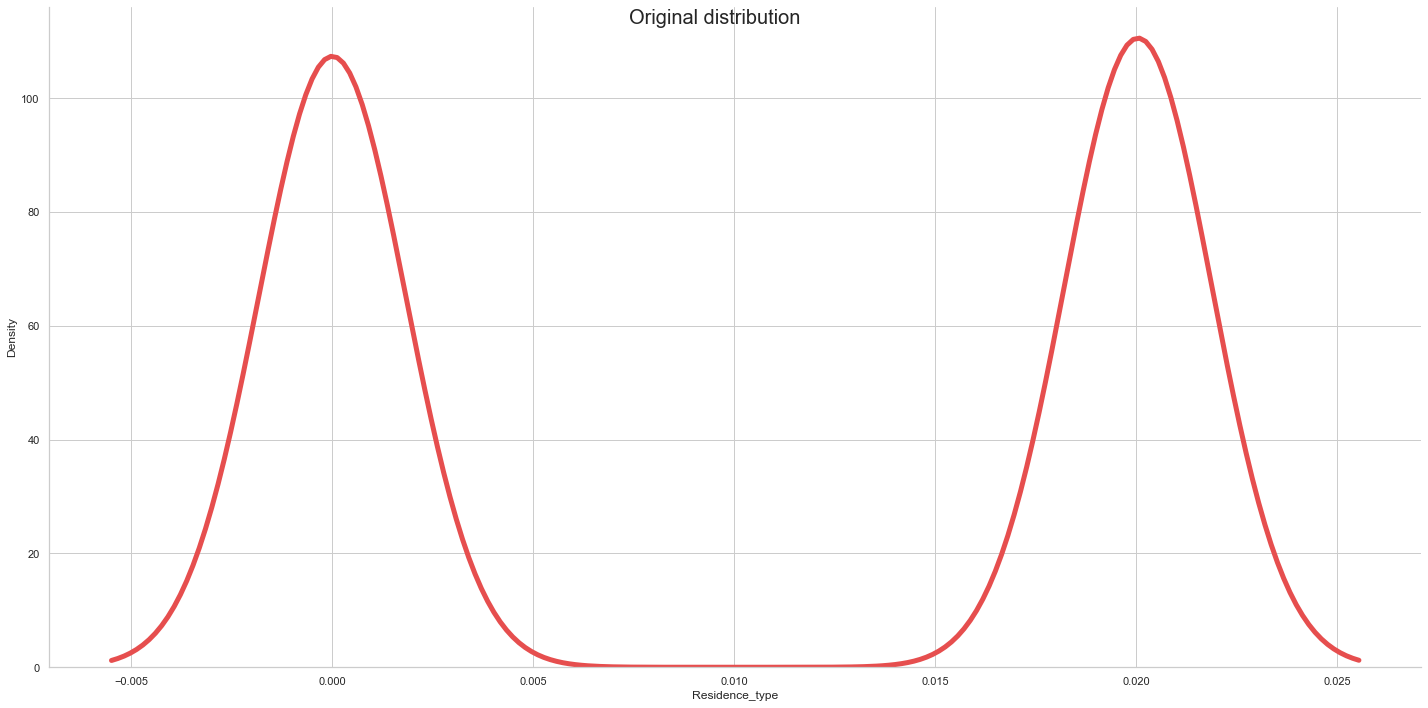

In [1266]:
# After Normalization
sns.set_style("whitegrid")

ax = sns.displot(scaled_nd.age, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

# After Normalization
sns.set_style("whitegrid")

ax = sns.displot(scaled_nd.bmi, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)


# After Normalization
sns.set_style("whitegrid")

ax = sns.displot(scaled_nd.heart_disease, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)


# After Normalization
sns.set_style("whitegrid")

ax = sns.displot(scaled_nd.hypertension, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)


# After Normalization
sns.set_style("whitegrid")

ax = sns.displot(scaled_nd.avg_glucose_level, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)


# After Normalization
sns.set_style("whitegrid")

ax = sns.displot(scaled_nd.gender, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)


# After Normalization
sns.set_style("whitegrid")

ax = sns.displot(scaled_nd.smoking_status, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)


# After Normalization
sns.set_style("whitegrid")

ax = sns.displot(scaled_nd.work_type, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)


# After Normalization
sns.set_style("whitegrid")

ax = sns.displot(scaled_nd.Residence_type, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

In [1267]:
# Standardize

scaled_df = pd.DataFrame(data)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(scaled_df)
standardized_df = pd.DataFrame(standardized_data, columns=scaled_df.columns)
print(standardized_df.head())

     gender       age  hypertension  heart_disease  ever_married  work_type  \
0  1.200240  1.069938     -0.318102       4.381499       0.72927  -0.155713   
1  1.200240  1.646336     -0.318102       4.381499       0.72927  -0.155713   
2 -0.833166  0.271847     -0.318102      -0.228232       0.72927  -0.155713   
3 -0.833166  1.601998      3.143642      -0.228232       0.72927   0.759543   
4  1.200240  1.690675     -0.318102      -0.228232       0.72927  -0.155713   

   Residence_type  avg_glucose_level       bmi  smoking_status    stroke  
0        0.985436      -1.403376e-14  1.224962       -0.351828  4.741651  
1       -1.014779       6.819909e-01  0.618778        0.585108  4.741651  
2        0.985436      -1.403376e-14  0.899692        1.522044  4.741651  
3       -1.014779      -1.403376e-14 -0.637945        0.585108  4.741651  
4        0.985436      -1.403376e-14  0.101304       -0.351828  4.741651  


Text(0.5, 0.98, 'Original distribution')

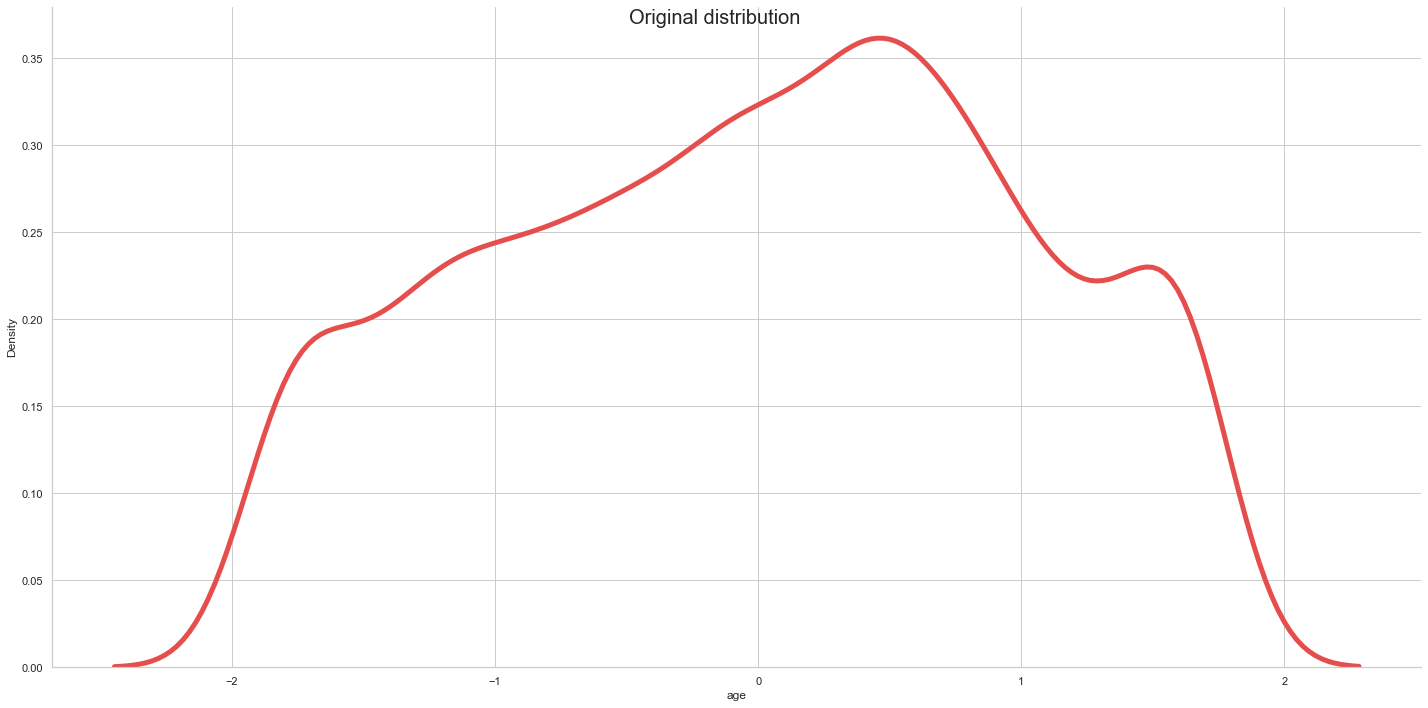

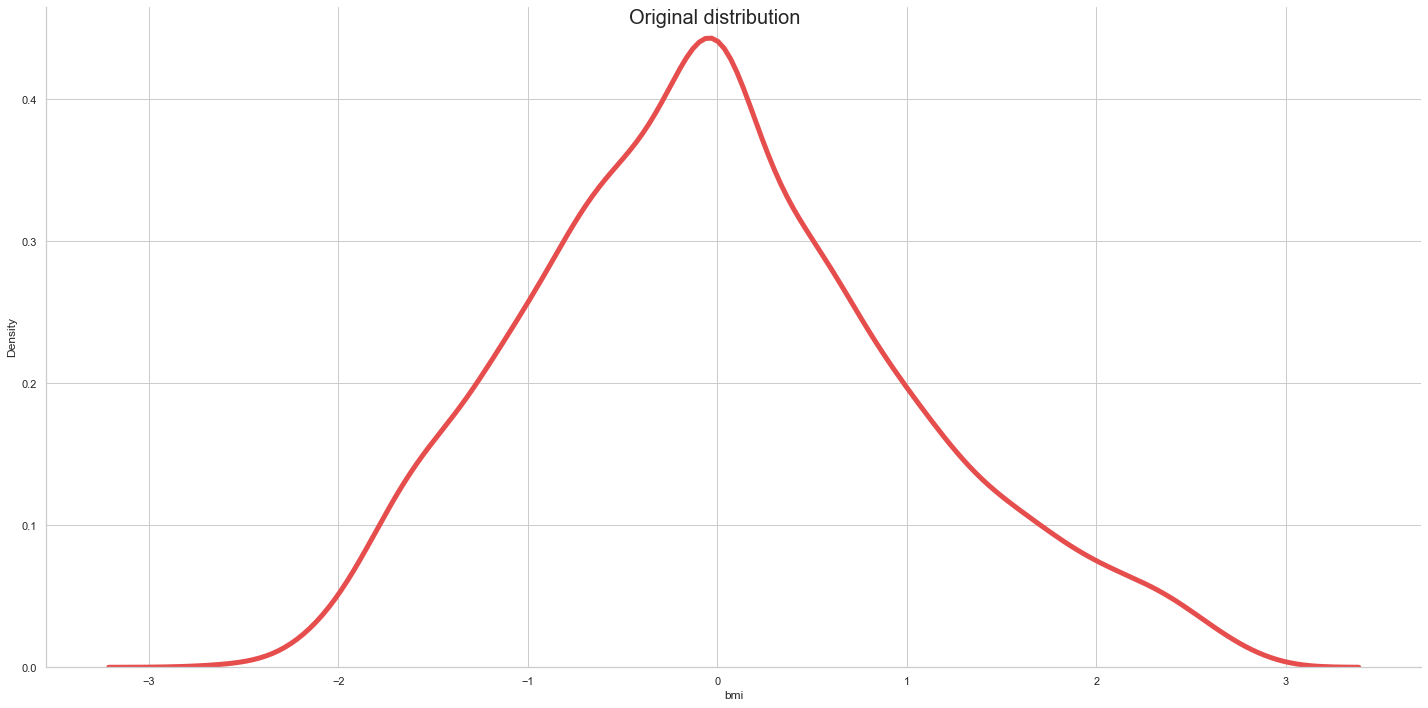

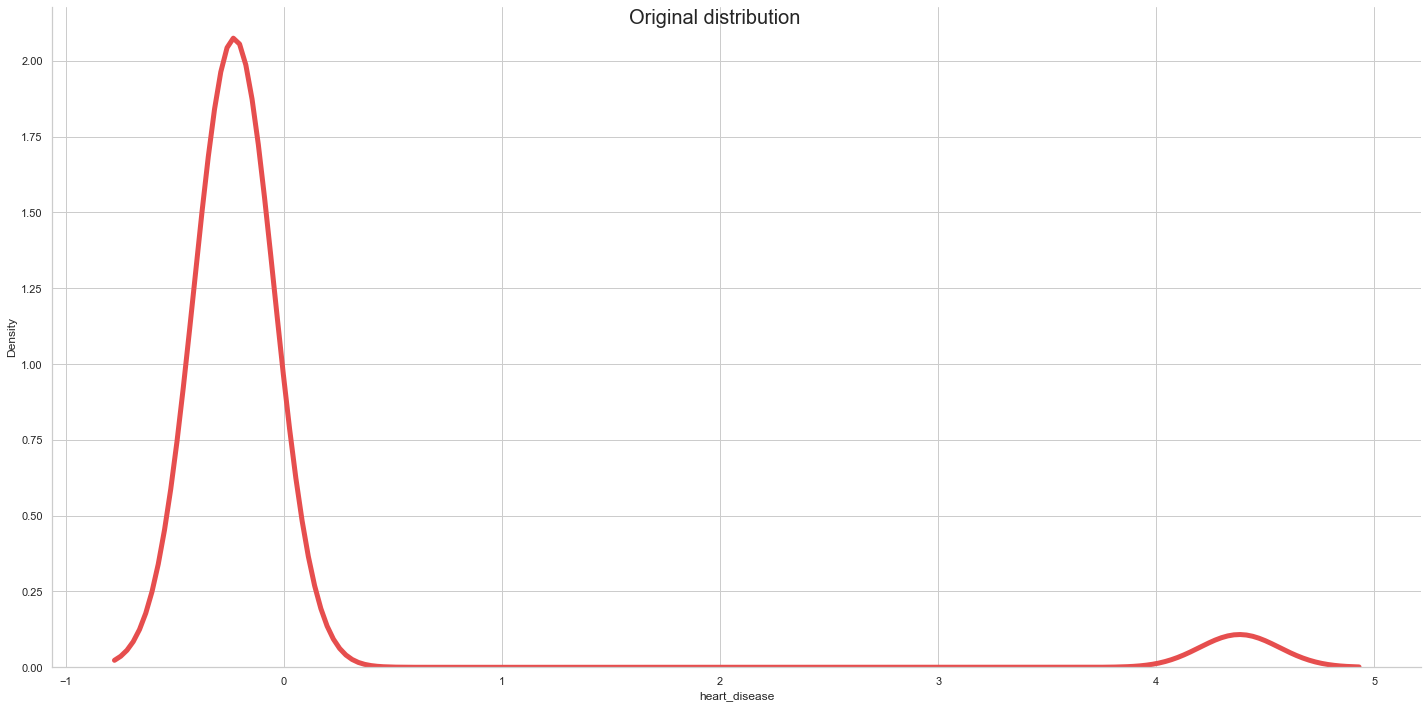

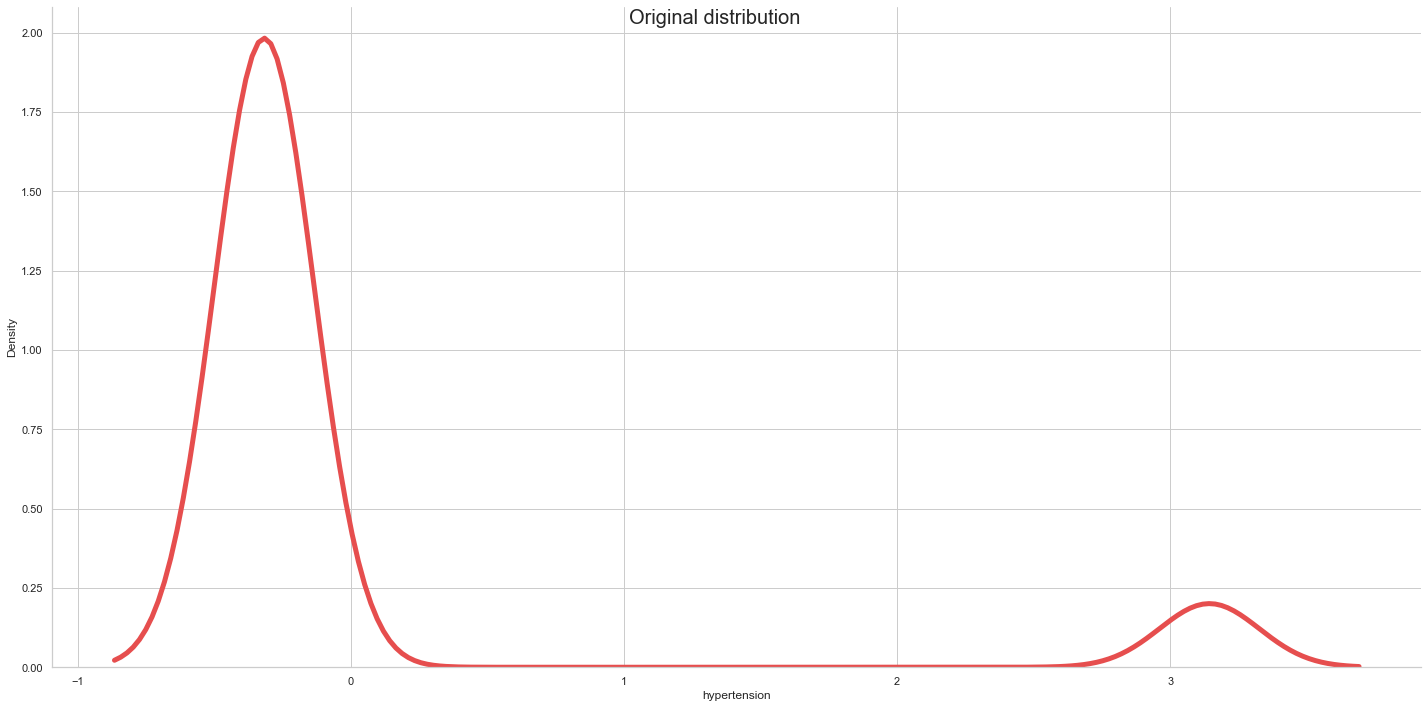

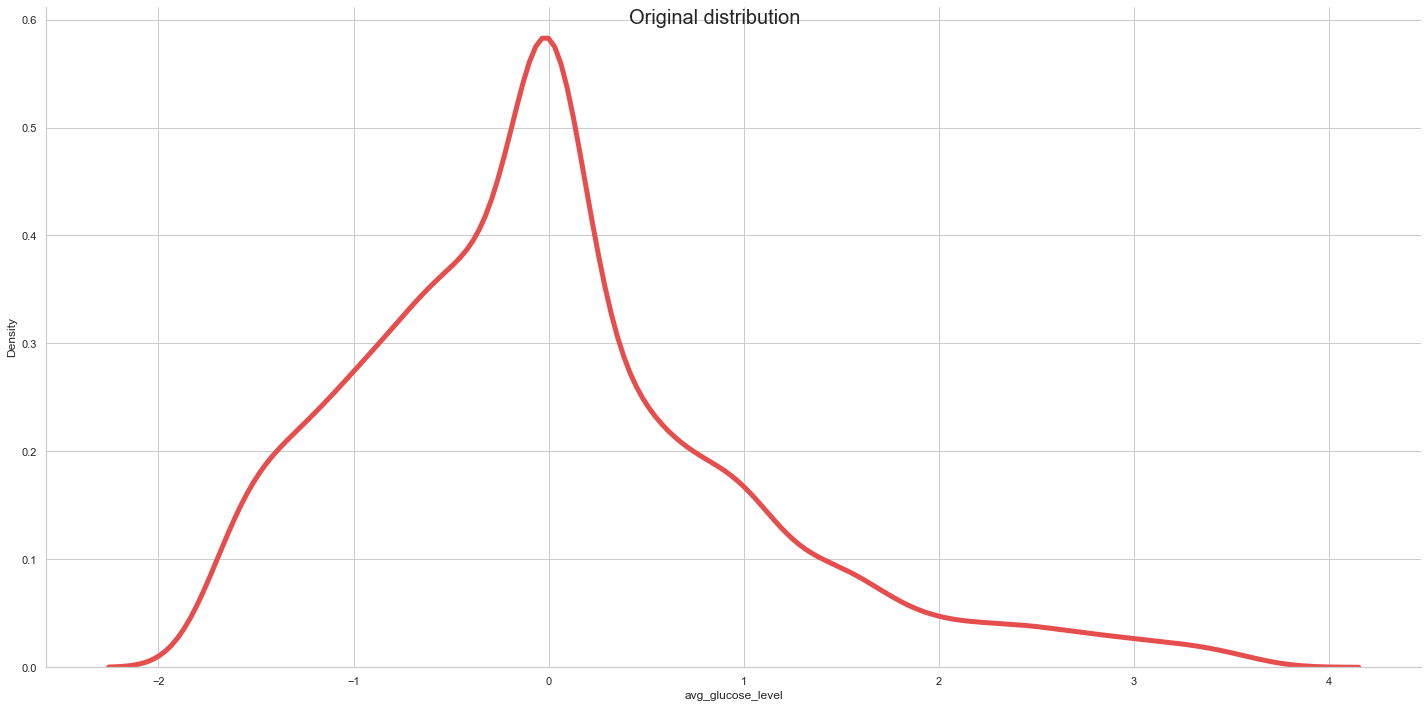

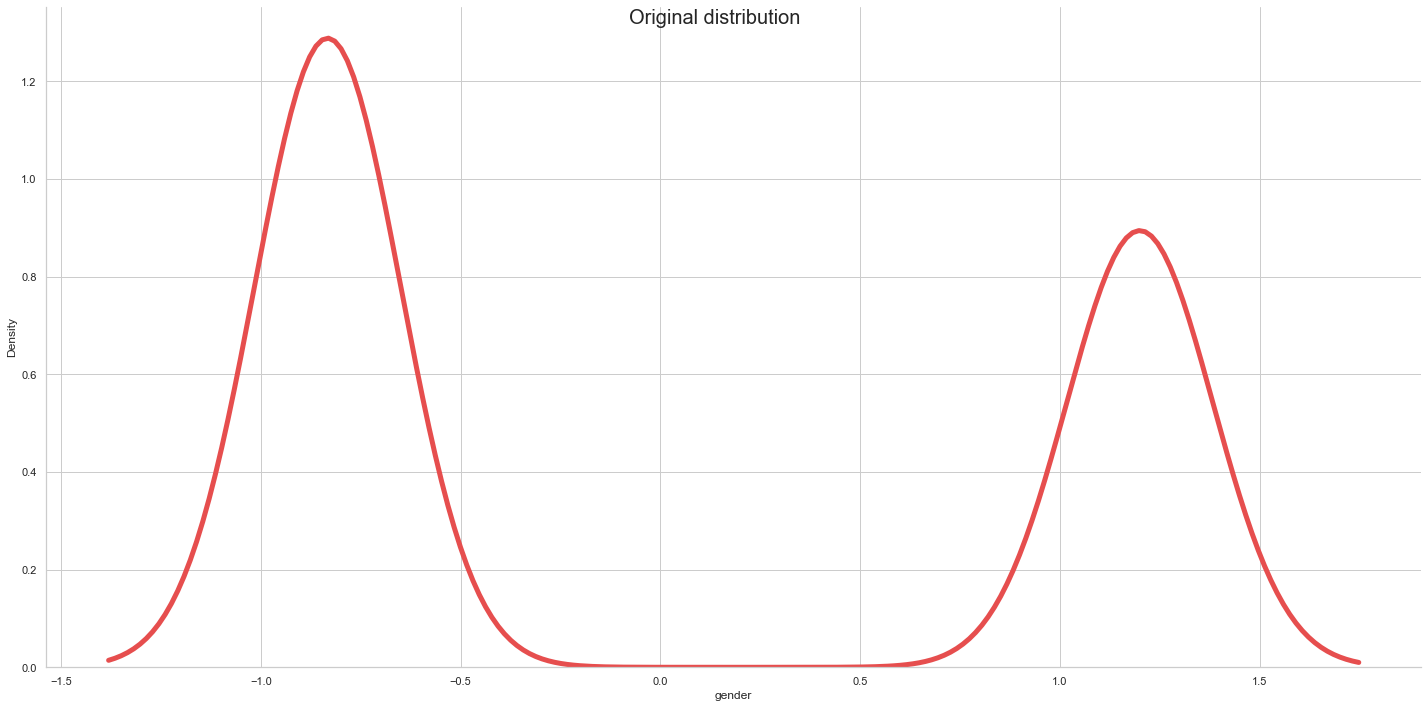

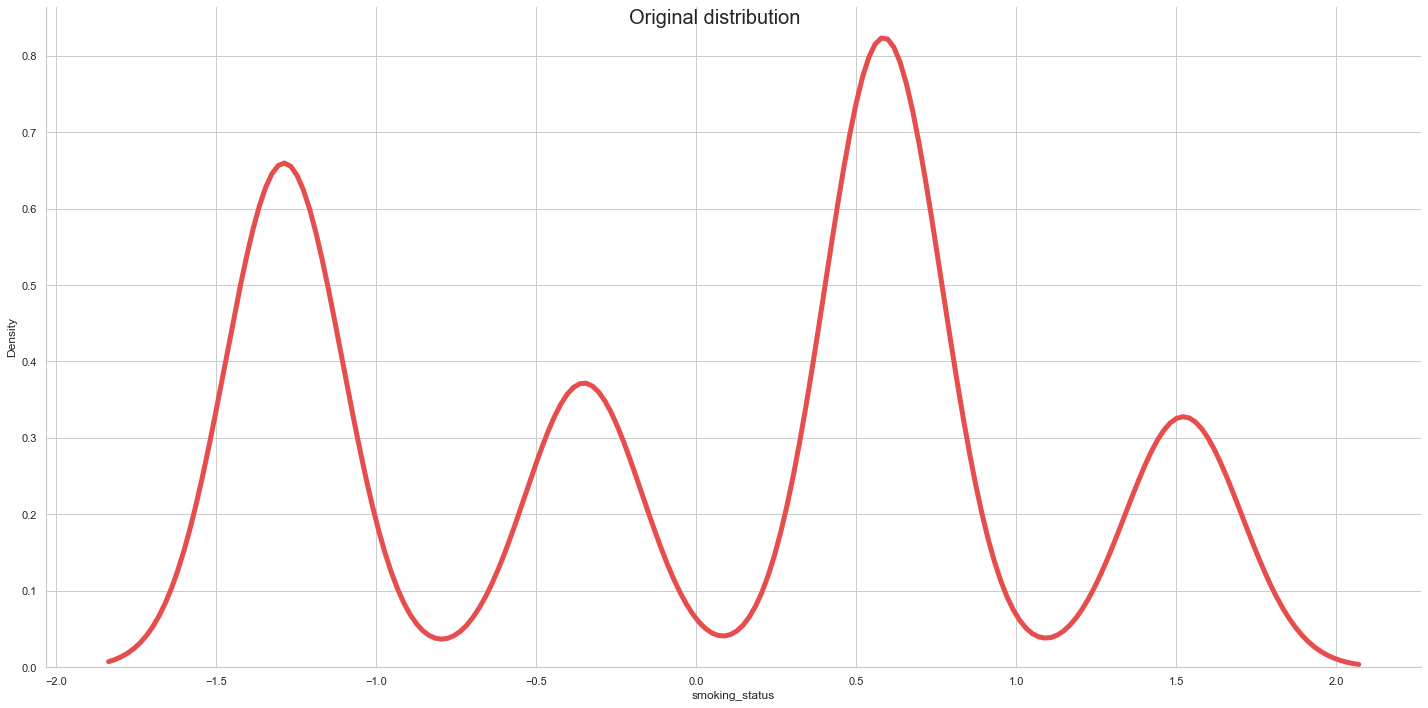

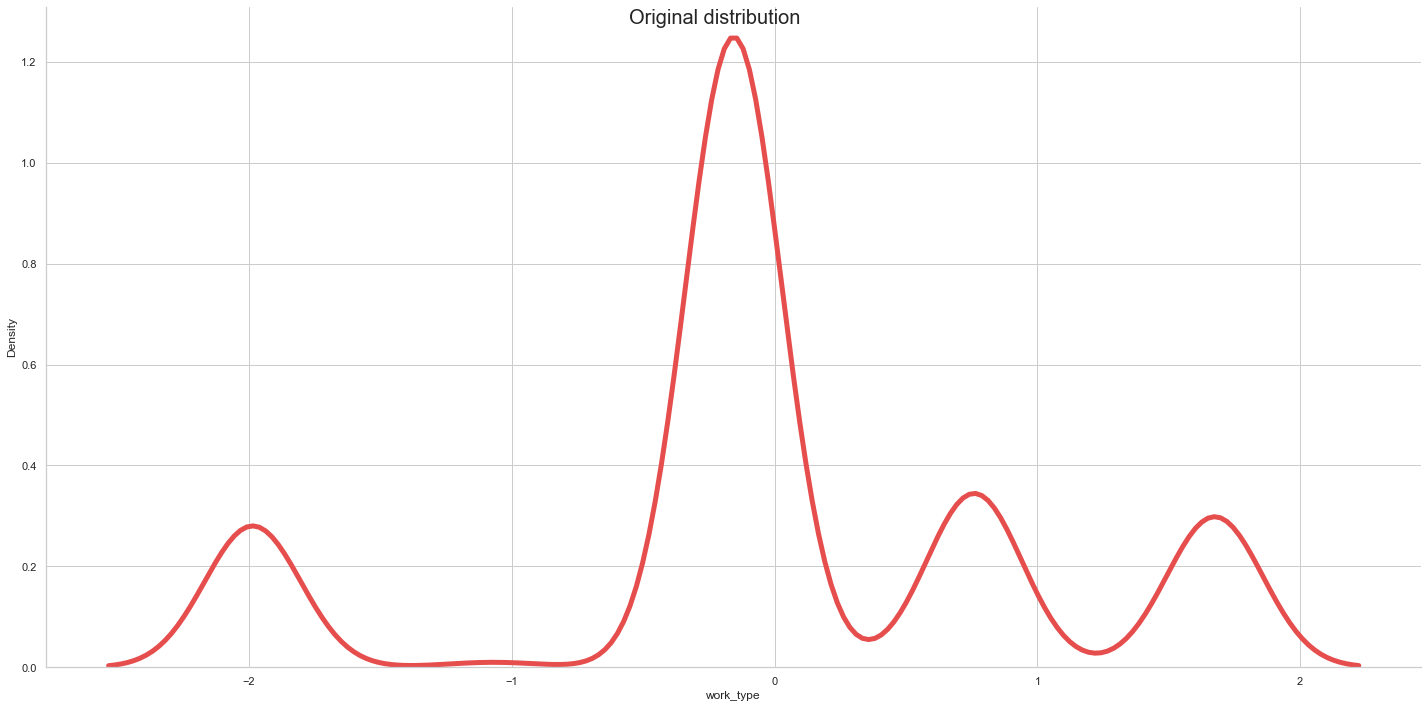

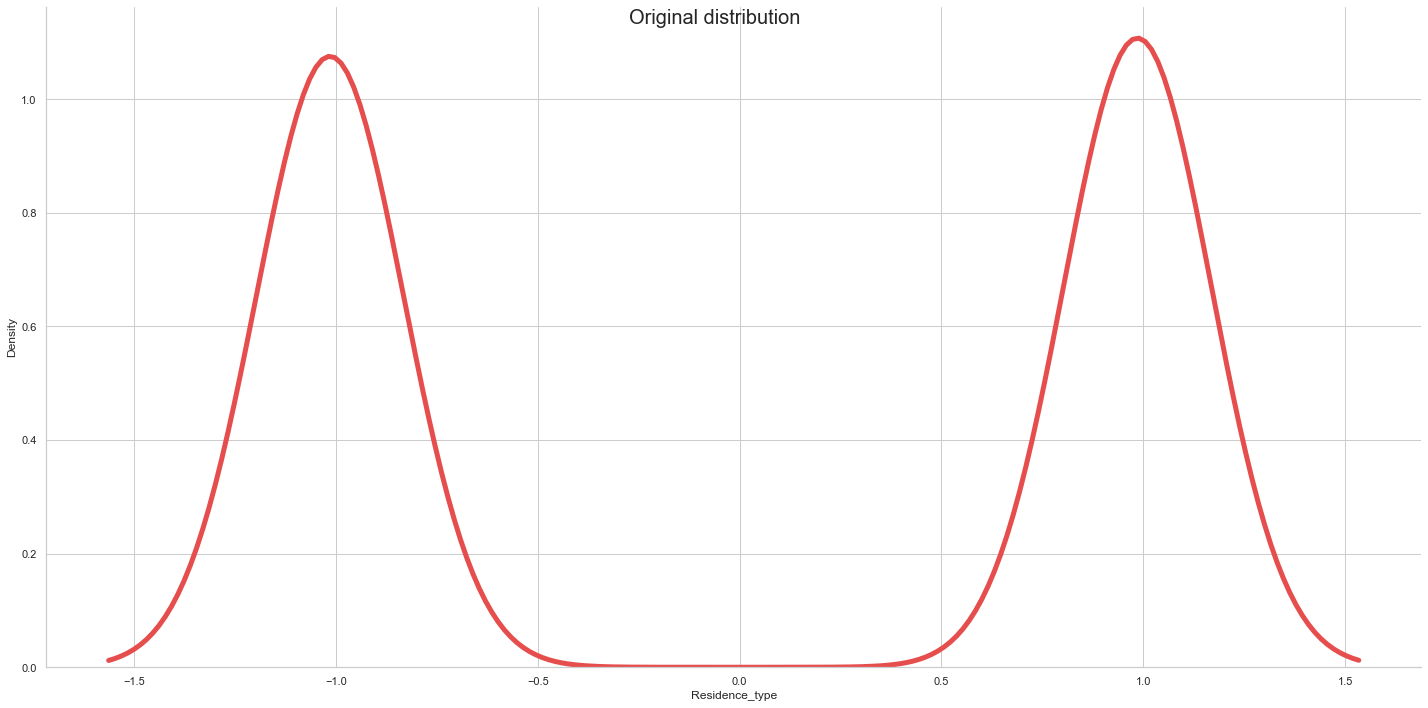

In [1268]:
sns.set_style("whitegrid")

ax = sns.displot(standardized_df.age, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

#%%

sns.set_style("whitegrid")

ax = sns.displot(standardized_df.bmi, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

#%%

sns.set_style("whitegrid")

ax = sns.displot(standardized_df.heart_disease, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

#%%

sns.set_style("whitegrid")

ax = sns.displot(standardized_df.hypertension, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

#%%

sns.set_style("whitegrid")

ax = sns.displot(standardized_df.avg_glucose_level, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

#%%

sns.set_style("whitegrid")

ax = sns.displot(standardized_df.gender, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

#%%

sns.set_style("whitegrid")

ax = sns.displot(standardized_df.smoking_status, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

#%%

sns.set_style("whitegrid")

ax = sns.displot(standardized_df.work_type, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

#%%

sns.set_style("whitegrid")

ax = sns.displot(standardized_df.Residence_type, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Original distribution', size = 20)

In [1269]:
# Aggregation

aggregated_data = pd.DataFrame(data)
aggregated_data.aggregate(['average', 'min', 'max'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
average,0.409739,42.86881,0.091891,0.049511,0.652812,2.17013,0.507335,91.417467,28.314819,1.375509,0.042584
min,0.000000,0.08000,0.000000,0.000000,0.000000,0.00000,0.000000,55.120000,10.300000,0.000000,0.000000
max,1.000000,82.00000,1.000000,1.000000,1.000000,4.00000,1.000000,168.060000,47.500000,3.000000,1.000000


In [1270]:
# Recursive Feature Elimination

# Removing High Correlated Features


correlated_features = set()
correlation_matrix = data.drop('stroke', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [1271]:
X = data.drop('stroke', axis=1)
target = data['stroke']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [1272]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 8


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

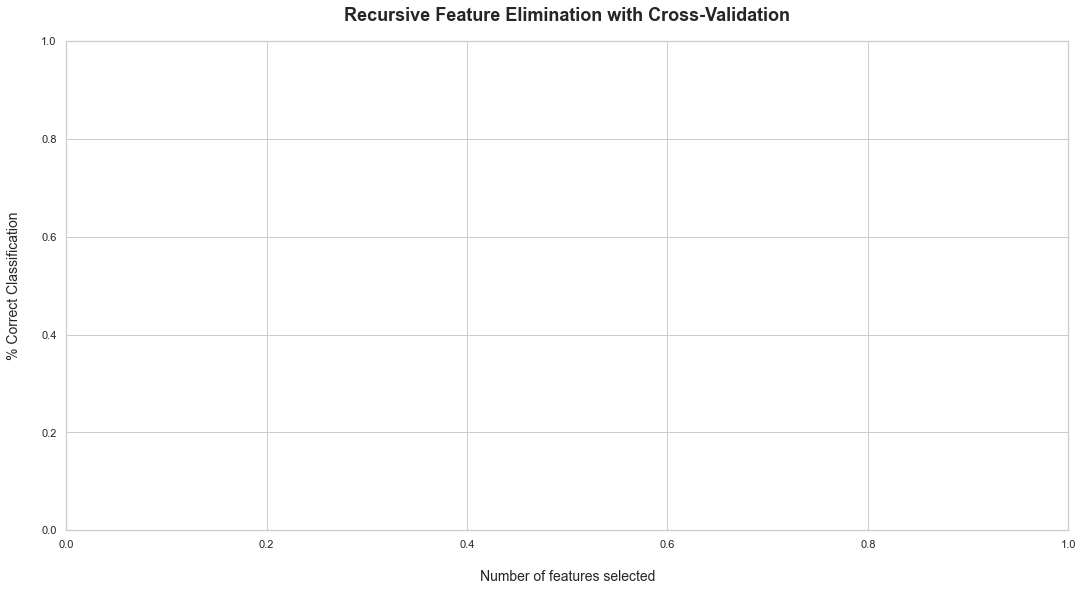

In [1273]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.cv_results_ ) + 1), rfecv.cv_results_ , color='#303F9F', linewidth=3)

plt.show()

In [1274]:

print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[3 4]


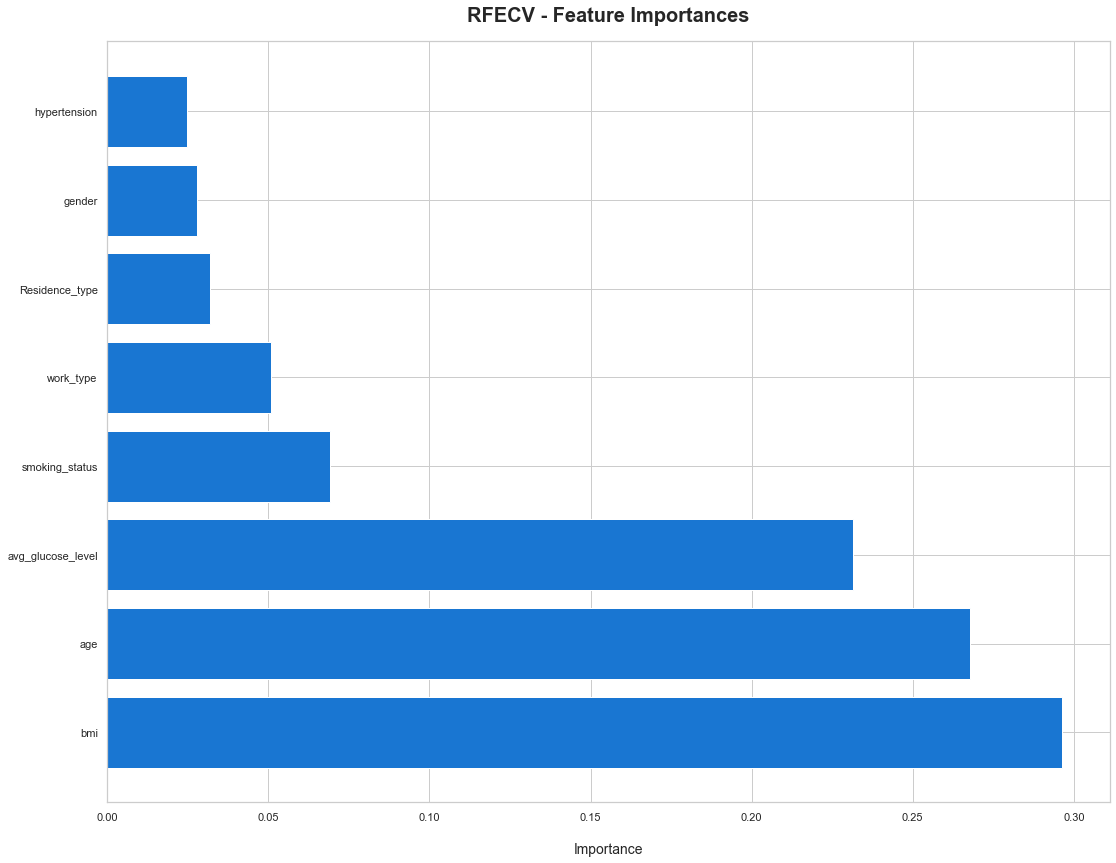

In [1275]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [1276]:
# Stratified Sampling

print((data['stroke'].value_counts()) / len(data) * 100)
ss_df = pd.DataFrame(data1)
ss_df.groupby(data['stroke'], group_keys=False).apply(lambda x: x.sample(10))
ss_df.groupby(data['stroke'], group_keys=False).apply(lambda x: x.sample(frac=0.01))

0    95.741646
1     4.258354
Name: stroke, dtype: float64


,avg_glucose_level
2177,92.56
1580,119.96
3444,64.66
1844,100.82
2009,93.00
2019,80.08
2330,89.22
1860,92.27
1291,74.72
2555,102.51


In [1277]:
target = 'stroke'

In [1278]:
X = data.loc[:, data.columns!='stroke']

In [1279]:
Y = data.loc[:, data.columns=='stroke']

In [1280]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

0    4699
1     209
Name: stroke, dtype: int64


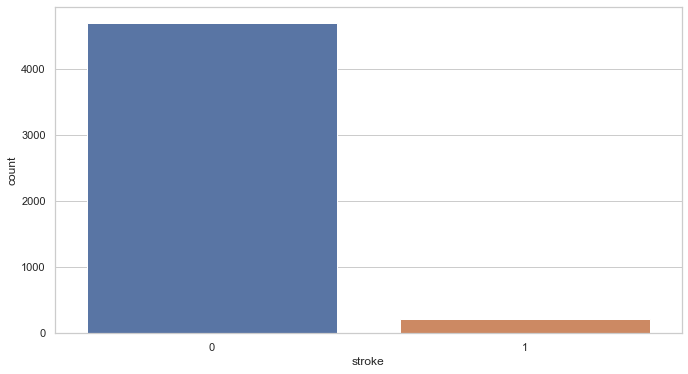

In [1281]:
ax = sns.countplot(x=target, data=data)
print(data[target].value_counts())

In [1282]:
100* (209/float(data.shape[0]))

4.258353708231459

In [1283]:
100* (4699/float(data.shape[0]))

95.74164629176855

In [1284]:
Y_train[target].value_counts()

0    3159
1     129
Name: stroke, dtype: int64

In [1285]:
clf = LogisticRegression().fit(X_train, Y_train)

In [1286]:
Y_Test_Pred = clf.predict(X_test)

In [1287]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,1540,80


In [1288]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9506172839506173
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


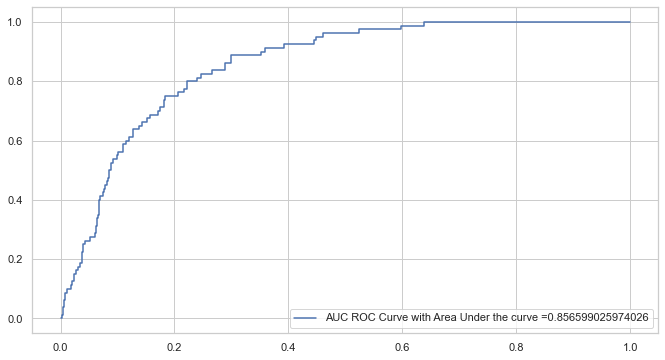

In [1289]:
generate_auc_roc_curve(clf, X_test)

In [1290]:
#Undersampling

minority_class_len = len(data[data[target] == 1])
print(minority_class_len)

209


In [1291]:
majority_class_indices = data[data[target] == 0].index
print(majority_class_indices)

Int64Index([ 249,  250,  251,  252,  253,  254,  255,  256,  257,  258,
            ...
            5098, 5100, 5101, 5102, 5103, 5104, 5106, 5107, 5108, 5109],
           dtype='int64', length=4699)


In [1292]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

209


In [1293]:
minority_class_indices = data[data[target] == 1].index
print(minority_class_indices)

Int64Index([  0,   2,   3,   4,   5,   6,   7,   9,  10,  11,
            ...
            238, 239, 240, 241, 242, 243, 244, 245, 246, 248],
           dtype='int64', length=209)


In [1294]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [1295]:
under_sample = data.loc[under_sample_indices]

<AxesSubplot:xlabel='stroke', ylabel='count'>

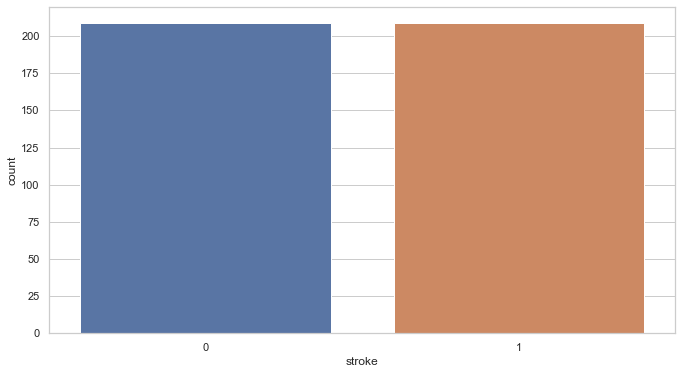

In [1296]:
sns.countplot(x=target, data=under_sample)

In [1297]:
X = under_sample.loc[:, data.columns!=target]
Y = under_sample.loc[:, data.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [1298]:
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [1299]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8115942028985508
Precision =  0.8026315789473685
Recall =  0.8472222222222222
F1 Score =  0.8243243243243243


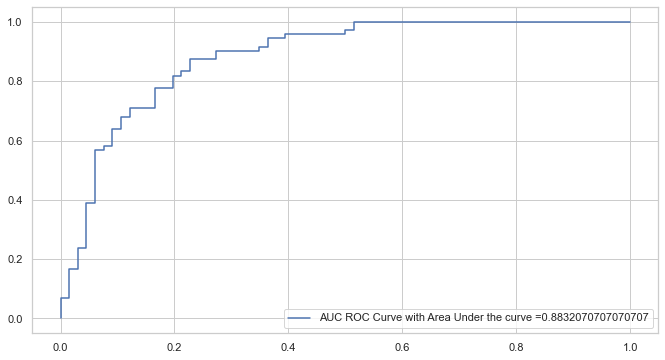

In [1300]:
generate_auc_roc_curve(clf, X_test)

In [1301]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [1302]:
#Random Forest 
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
cr_rf = classification_report(Y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78        66
           1       0.79      0.81      0.80        72

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138



RandomForestClassifier()       gender   age  hypertension  heart_disease  ever_married  work_type  \
5046       1  44.0             0              0             1          2   
3845       0  42.0             0              0             1          0   
4931       0  53.0             1              0             1          0   
69         0  80.0             1              0             1          3   
187        0  82.0             1              1             1          0   
...      ...   ...           ...            ...           ...        ...   
1883       0  44.0             0              0             1          2   
2177       1   5.0             0              0             0          4   
1265       0  14.0             0              0             0          2   
3954       0  55.0             0              0             1          0   
4100       0  17.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status 

<AxesSubplot:>

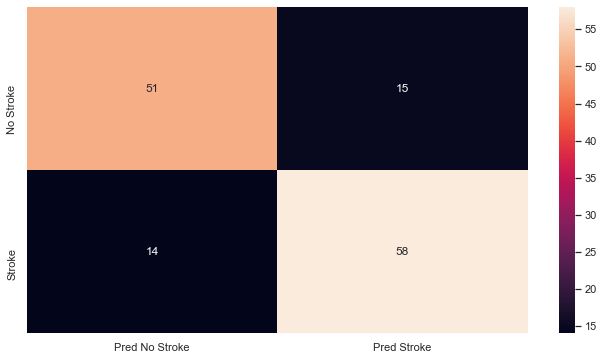

In [1303]:
print(rf, X_test, Y_test)
sns.heatmap(
    confusion_matrix(Y_test, y_pred_rf),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

In [1304]:
#K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)
cr_knn = classification_report(Y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        66
           1       0.75      0.85      0.80        72

    accuracy                           0.78       138
   macro avg       0.78      0.77      0.77       138
weighted avg       0.78      0.78      0.77       138



<AxesSubplot:>

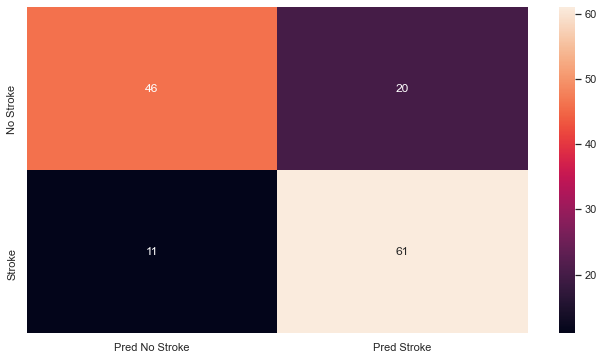

In [1305]:
sns.heatmap(
    confusion_matrix(Y_test, y_pred_knn),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

In [1306]:
#AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)
y_pred_ada = ada.predict(X_test)
cr_ada = classification_report(Y_test, y_pred_ada)
print(cr_ada)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        66
           1       0.79      0.74      0.76        72

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.76      0.76      0.76       138



AdaBoostClassifier()       gender   age  hypertension  heart_disease  ever_married  work_type  \
5046       1  44.0             0              0             1          2   
3845       0  42.0             0              0             1          0   
4931       0  53.0             1              0             1          0   
69         0  80.0             1              0             1          3   
187        0  82.0             1              1             1          0   
...      ...   ...           ...            ...           ...        ...   
1883       0  44.0             0              0             1          2   
2177       1   5.0             0              0             0          4   
1265       0  14.0             0              0             0          2   
3954       0  55.0             0              0             1          0   
4100       0  17.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
50

<AxesSubplot:>

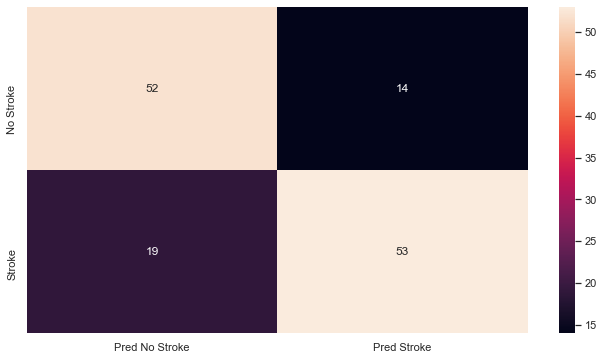

In [1307]:
print(ada, X_test, Y_test)
sns.heatmap(
    confusion_matrix(Y_test, y_pred_ada),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        66
           1       0.77      0.71      0.74        72

    accuracy                           0.74       138
   macro avg       0.74      0.74      0.74       138
weighted avg       0.74      0.74      0.74       138



<AxesSubplot:>

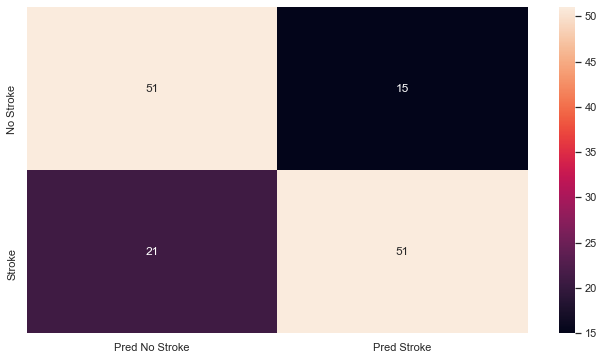

In [1308]:
#Decision Tree
dtc= DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred_dtc=dtc.predict(X_test)
cr_dtc = classification_report(Y_test, y_pred_dtc)
print(cr_dtc)


sns.heatmap(
    confusion_matrix(Y_test, y_pred_dtc),
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

In [1309]:
#Conclusion--------Comparing all techniques with cross validation and obtain the most effective model for stroke prediction.
def cv_comparison(models,x,y,cv):
    cv_accuracies = pd.DataFrame()
    accs = []
    pres = []
    recs = []
    f1s = []
    
    for model in models:
        acc = cross_val_score(model, x, y, scoring='accuracy', cv=cv)
        accs.append(acc)
        pre = cross_val_score(model, x, y, scoring='precision', cv=cv)
        pres.append(pre)
        rec = cross_val_score(model, x, y, scoring='recall', cv=cv)
        recs.append(rec)
        f1 = cross_val_score(model, x, y, scoring='f1', cv=cv)
        f1s.append(f1)
        cv_accuracies[str(model)] = [acc.mean(), pre.mean(), rec.mean(), f1.mean()]
    cv_accuracies.index = ['Accuracy', 'Precision', 'Recall', 'F1']
    return cv_accuracies, accs, pres, recs, f1s
from sklearn.model_selection import cross_val_score,cross_validate

lr = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
dt = DecisionTreeClassifier()

models=[lr,rf,knn,ada,dt]

cv_df,accs, pres, recs, f1s = cv_comparison (models,X_test, Y_test,10)
print(cv_df)

           LogisticRegression()  RandomForestClassifier()  \
Accuracy               0.813187                  0.831868   
Precision              0.815635                  0.820000   
Recall                 0.848214                  0.860714   
F1                     0.824156                  0.858229   

           KNeighborsClassifier()  AdaBoostClassifier()  \
Accuracy                 0.760989              0.751648   
Precision                0.743651              0.748120   
Recall                   0.832143              0.803571   
F1                       0.779468              0.759267   

           DecisionTreeClassifier()  
Accuracy                   0.779670  
Precision                  0.786706  
Recall                     0.791071  
F1                         0.768855  


In [1312]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

print('Train data set \n', X_train)
print('\nTest data set \n' , X_test)

Train data set 
 [[-0.87872174  1.04977192  2.         ...  2.02664126 -1.37398527
   0.41445807]
 [-0.87872174 -0.24065927 -0.5        ... -0.8610486  -1.30928838
   0.41445807]
 [ 1.13801668 -1.70314796 -0.5        ... -0.59239059 -0.04530219
   0.41445807]
 ...
 [-0.87872174 -2.00424858 -0.5        ... -0.951113   -1.87538619
  -1.53593286]
 [-0.87872174 -0.54175989 -0.5        ... -0.76023788 -0.56527413
   0.41445807]
 [-0.87872174 -0.02558741  2.         ... -1.45260796  0.27578547
  -1.53593286]]

Test data set 
 [[ 1.13801668 -0.41271677 -0.5        ... -0.06428569  0.97127705
  -1.53593286]
 [-0.87872174 -0.49874551 -0.5        ...  0.46074883  0.77718638
   0.41445807]
 [-0.87872174 -0.02558741  2.         ...  0.3926888   1.65059442
   1.38965354]
 ...
 [-0.87872174 -1.70314796 -0.5        ...  1.4263825  -0.62997102
  -1.53593286]
 [-0.87872174  0.06044134 -0.5        ...  0.44539695 -1.37398527
  -0.56073739]
 [-0.87872174 -1.57410484 -0.5        ...  0.94433326 -0.3711834

In [1313]:
#Building NaiveBayes Model

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0], dtype=int64)

In [1314]:
test_score = model.score(X_test, Y_test)
print("NBtest_score:", test_score)

train_score = model.score(X_train, Y_train)
print("NBtrain_score:",train_score)

from sklearn import metrics
print("\nGaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)

report = classification_report(Y_test, y_pred)
print(report)

NBtest_score: 0.7898550724637681
NBtrain_score: 0.7535714285714286

Gaussian Naive Bayes model accuracy(in %): 78.98550724637681
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        66
           1       0.80      0.79      0.80        72

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138

